In [1]:
from functions.network_generation import erdos, barabasi_albert, focussed_assort_network_gen, write_graph, fully_assortative_network, fully_disassortative_network
from functions.metrics import calc_avg_degree, calc_pearson, calc_betweenness, calc_deg_assort, pearson, dos_df, dos_neighbors, check_lonely
from functions.model import mainModel

from functions.visualize import plot_timeseries, set_labels_and_titles, plot_metric_data, plot_grid, nx_network_mp4, point_on_triangle, plot_triangle
import researchhelper.visualize.general_formatting as gf

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
import os
import json
import re

cmap = plt.get_cmap("tab10")
norm = mcolors.Normalize(vmin=-1, vmax=1)

%load_ext autoreload
%autoreload 2


In [2]:
conf["base_path"] = "output/"
conf["points"] = [[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]],
                  [[0.8, 0.1, 0.1], [0.1, 0.8, 0.1], [0.1, 0.1, 0.8]],
                  [[0.5, 0.5, 0.0], [0.5, 0.0, 0.5], [0.0, 0.5, 0.5]]]

NameError: name 'conf' is not defined

In [3]:
with open("input/configs/main_config.json", "r") as f:
    conf = json.load(f)
conf["network_gen_fn"] = globals().get(conf["network_gen_fn"])
conf_path = f"{conf['network_gen_fn'].__name__}-{conf['e_samples']}es-{conf['n_per_group']}n-{conf['p_rel']}p"

point_dict = {
    "[1, 0, 0]": "Pure Cognitive",
    "[0, 1, 0]": "Pure Behavior",
    "[0, 0, 1]": "Pure Contagion",
    "[1.0, 0.0, 0.0]": "Pure Cognitive",
    "[0.0, 1.0, 0.0]": "Pure Behavior",
    "[0.0, 0.0, 1.0]": "Pure Contagion",

    "[0.5, 0.5, 0.0]": "Mixed Cognitive-Behavior",
    "[0.5, 0.0, 0.5]": "Mixed Cognitive-Contagion",
    "[0.0, 0.5, 0.5]": "Mixed Behavior-Contagion",

    "[0.5, 0.5, 0]": "Mixed Cognitive-Behavior",
    "[0.5, 0, 0.5]": "Mixed Cognitive-Contagion",
    "[0, 0.5, 0.5]": "Mixed Behavior-Contagion",
    "[0.8, 0.1, 0.1]": "Dominant Cognitive",
    "[0.1, 0.8, 0.1]": "Dominant Behavior",
    "[0.1, 0.1, 0.8]": "Dominant Contagion",
}

In [87]:
len(G.nodes)

1000

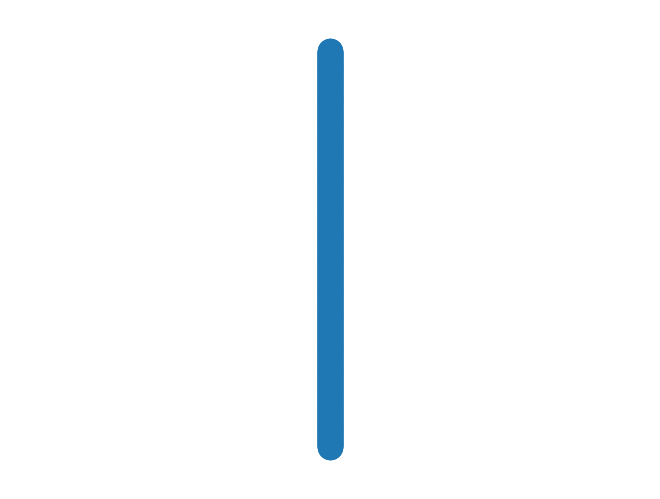

In [86]:
top = list(range(500))
pos = nx.bipartite_layout(G, top)
nx.draw(G, pos)

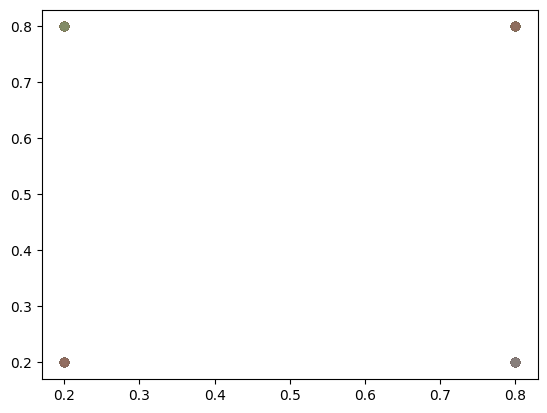

In [90]:
pairs = [[G.nodes[edge[0]]["e"], G.nodes[edge[1]]["e"]] for edge in G.edges]
for pair in pairs:
    plt.scatter(pair[0], pair[1], alpha=0.1)

In [85]:
Gs = []
point = [0,1,0]
model_path = f"p{'-'.join(str(np.round(p,2)) for p in point)}_b{conf['beta']}_sd{conf['sim_dur']}"
t0_assort_dir_path = os.path.join(
                "input", conf["t0_path"], conf_path, str(.4)
            )
files = os.listdir(t0_assort_dir_path)
G = nx.read_gml(os.path.join(t0_assort_dir_path, files[0]))
# Gs.append(G.copy())
# model_parameters = {"G": G.copy(), "h": 0.05, "beta": 1 / 2, "point": point}
# model = mainModel(**model_parameters)
# for t in range(10000+1):
#     if t%1000 == 0:
#         print(t)
#     model.next()
#     if t in [100, 1000, 10000]:
#         Gs.append(model.G.copy())

# TODO

Choose 2 colors in 2 shades each (so 4 colors) and keep tabs on initial states. So two colors based on $e_i$ and two shades based on congruency (e.g., dark is congruent). Make these for each point on timesteps 100, 1000, 10000.


NodeView(('00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '028', '029', '031', '036', '039', '040', '042', '043', '044', '049', '053', '059', '061', '062', '070', '072', '076', '081', '088', '089', '091', '094', '097', '0100', '0101', '0105', '0107', '0111', '0113', '0115', '0116', '0118', '0137', '0142', '0148', '0151', '0155', '0159', '0164', '0170', '0179', '0181', '0182', '0227', '0229', '0243', '0257', '0271', '0285', '0287', '0305', '0306', '0313', '0322', '0326', '0329', '0334', '0336', '0354', '0372', '0374', '0383', '0400', '0411', '0424', '0437', '0444', '0451', '0456', '0470', '0477', '0481', '0486', '030', '035', '056', '057', '064', '066', '069', '086', '096', '099', '0114', '0131', '0136', '0173', '0176', '0178', '0184', '0217', '0221', '0226', '0230', '0237', '0239', '0252', '0298', '0311', '0319', '0335', '0351', '0360', '0361', '0369', '037

In [220]:
def set_colors(n1, n2):
    if (n1[0] == "0") and (n2[0] == "0"):
        return "#443D83"
    elif (n1[0] == "0") and (n2[0] == "1"):
        return "#8073F5"
    elif (n1[0] == "1") and (n2[0] == "1"):
        return "#406923"
    elif (n1[0] == "1") and (n2[0] == "0"):
        return "#8DE84D"
    else:
        return "#000000"

In [264]:
Gs = []
for yidx, point in enumerate([[1,0,0],[0,1,0],[0,0,1]]):
    G_row = []
    model_path = f"p{'-'.join(str(np.round(p,2)) for p in point)}_b{conf['beta']}_sd{conf['sim_dur']}"
    t0_assort_dir_path = os.path.join(
                    "input", conf["t0_path"], conf_path, str(.4)
                )
    files = os.listdir(t0_assort_dir_path)
    G = nx.read_gml(os.path.join(t0_assort_dir_path, files[0]))
    G_row.append(G.copy())
    model_parameters = {"G": G.copy(), "h": 0.05, "beta": 1 / 2, "point": point}
    model = mainModel(**model_parameters)
    for t in range(10_000+1):
        if t%1_000 == 0:
            print(t)
        model.next()
        if t in [100, 1_000, 10_000]:
            G_row.append(model.G.copy())
    Gs.append(G_row)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


In [272]:
3//2

1

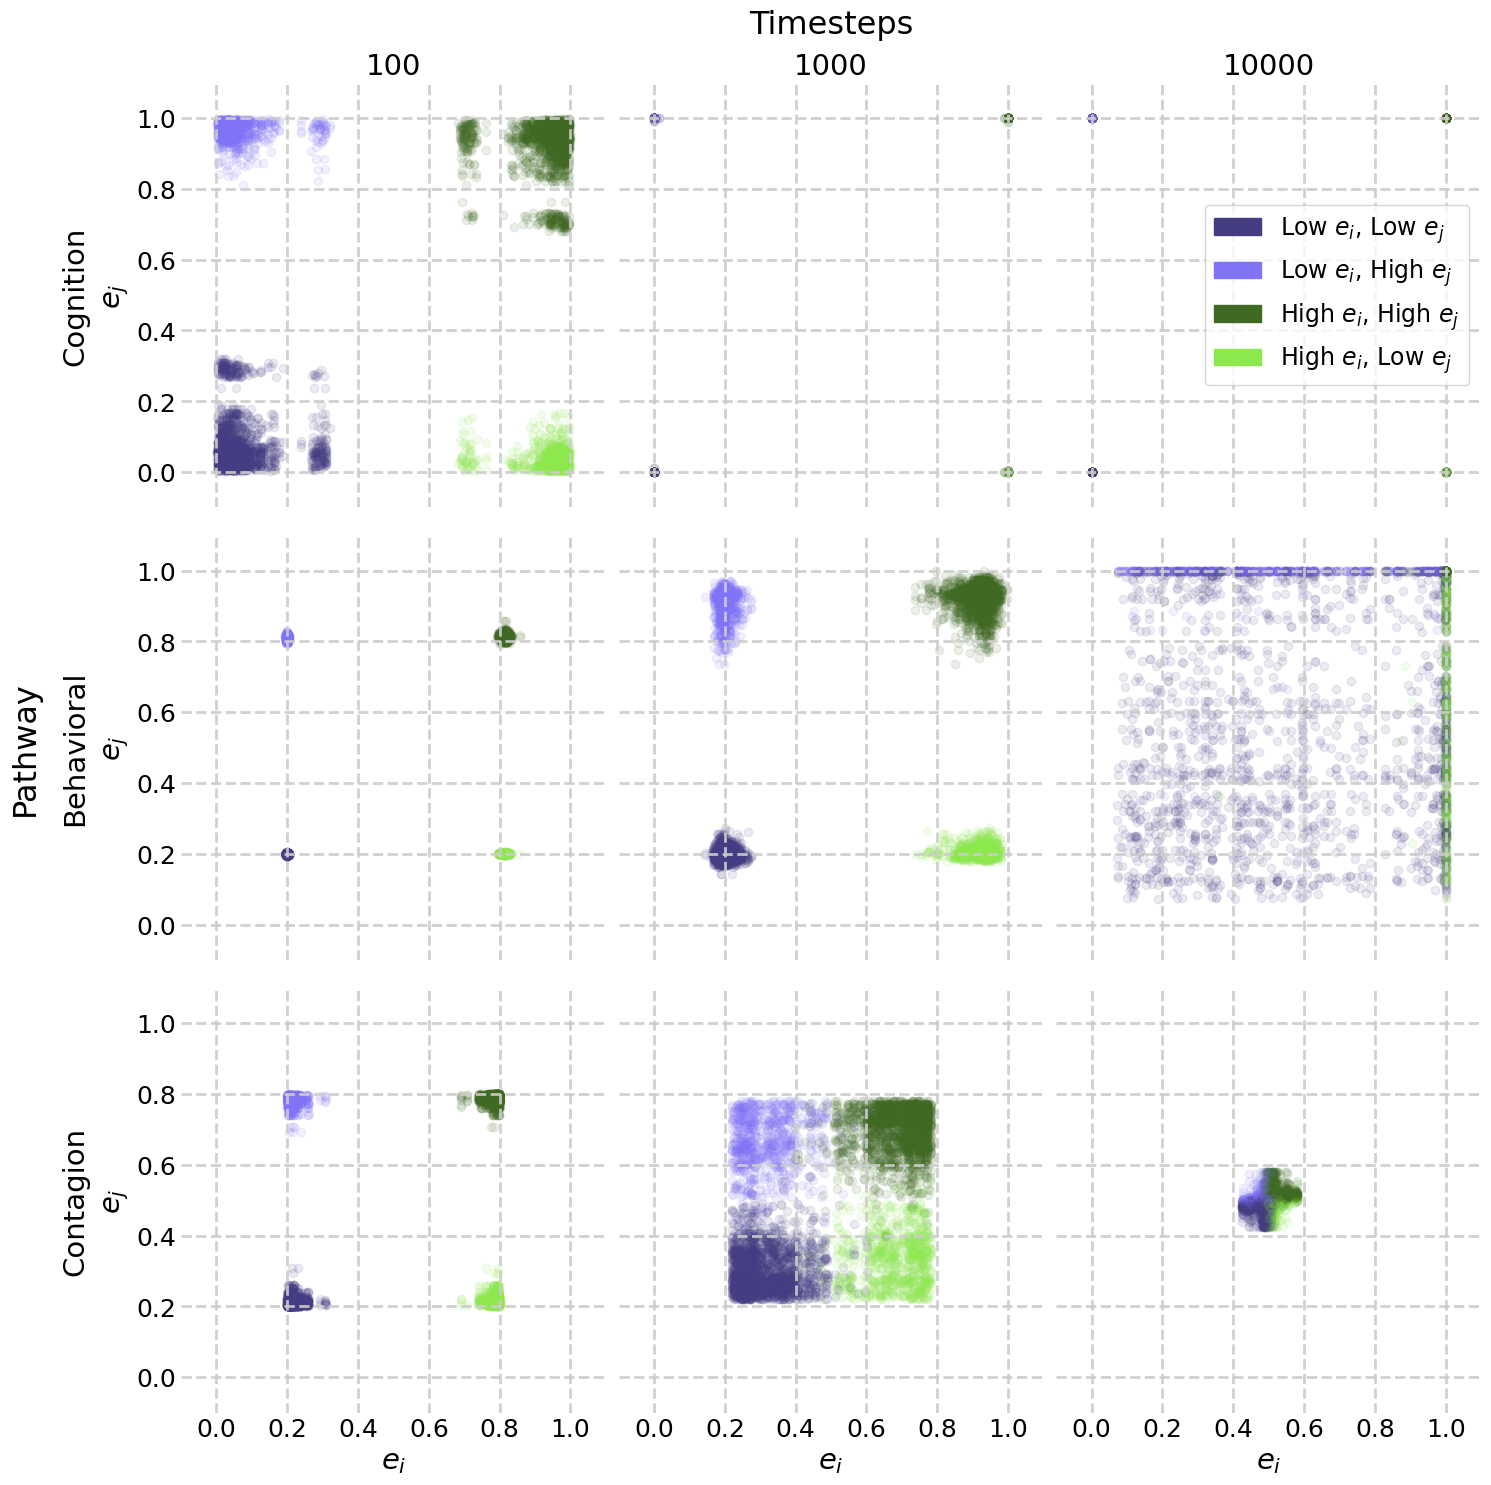

In [273]:
fig, ax = plt.subplots(3,3, figsize=(15,15), sharey=True, sharex=True)
for yidx, point in enumerate([[1,0,0],[0,1,0],[0,0,1]]):
    cmap_s = plt.get_cmap("viridis")

    labels = [100,1_000,10_000]
    for idx, G in enumerate(Gs[yidx][1:]):
        edges = np.array(G.edges)
        for edge in np.random.choice(range(len(edges)), len(edges)//2, replace=False):
            edge = edges[edge]
            ax[yidx, idx].scatter(G.nodes[edge[0]]["e"], G.nodes[edge[1]]["e"], color=set_colors(edge[0], edge[1]), alpha=0.1)
        ax[yidx, idx].set_ylim(-.1,1.1)
        ax[yidx, idx].set_xlim(-.1,1.1)
        gf.set_frame(ax=ax[yidx, idx])
        label_size = 21
        title_size = 21
        tick_size = 18
        if yidx == 0 and idx == 0:
            set_labels_and_titles(
                ax=ax[yidx, idx],
                title=f"{labels[idx]}",
                xlabel=r"",
                ylabel=rf"$e_j$",    
                tick_size=tick_size,
                label_size=label_size,
                title_size=title_size,
            )
        elif yidx == 0:
            set_labels_and_titles(
                ax=ax[yidx, idx],
                title=f"{labels[idx]}",
                xlabel=r"",
                ylabel=r"",    
                tick_size=tick_size,
                label_size=label_size,
                title_size=title_size,
            )
        elif yidx == 1 and idx == 0:
            set_labels_and_titles(
                ax=ax[yidx, idx],
                title=f"",
                xlabel=r"",
                ylabel=r"$e_j$",    
                tick_size=tick_size,
                label_size=label_size,
                title_size=title_size,
            )
        elif yidx == 1:
            set_labels_and_titles(
                ax=ax[yidx, idx],
                title=f"",
                xlabel=r"",
                ylabel=r"",    
                tick_size=tick_size,
                label_size=label_size,
                title_size=title_size,
            )
        elif yidx == 2 and idx == 0:
            set_labels_and_titles(
                ax=ax[yidx, idx],
                title=f"",
                xlabel=r"$e_i$",
                ylabel=r"$e_j$",    
                tick_size=tick_size,
                label_size=label_size,
                title_size=title_size,
            )
        elif yidx == 2:
            set_labels_and_titles(
                ax=ax[yidx, idx],
                title=f"",
                xlabel=r"$e_i$",
                ylabel=r"",    
                tick_size=tick_size,
                label_size=label_size,
                title_size=title_size,
            )
        ax[yidx, idx].set_box_aspect(1)
patches = [
    mpatches.Patch(color="#443D83", label=r"Low $e_i$, Low $e_j$"),
    mpatches.Patch(color="#8073F5", label=r"Low $e_i$, High $e_j$"),
    mpatches.Patch(color="#406923", label=r"High $e_i$, High $e_j$"),
    mpatches.Patch(color="#8DE84D", label=r"High $e_i$, Low $e_j$")
]
ax[0,2].legend(handles=patches, prop={'size': 17})
rows = ['Cognition', 'Behavioral', 'Contagion']
pad = 5 # in points
ax[0,1].annotate("Timesteps", xy=(0.5, 1.1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size=23, ha='center', va='baseline')
for axis, row in zip(ax[:,0], rows):
    axis.annotate(row, xy=(0, 0.5), xytext=(-axis.yaxis.labelpad - pad, 0),
                xycoords=axis.yaxis.label, textcoords='offset points',
                size=21, ha='right', va='center', rotation = 90)
    
ax[1,0].annotate("Pathway", xy=(-1.7, 0.5), xytext=(-ax[1,0].yaxis.labelpad - pad, 0),
                xycoords=ax[1,0].yaxis.label, textcoords='offset points',
                size=23, ha='right', va='center', rotation = 90)
plt.tight_layout()
plt.savefig("./results/energies_half.png", dpi=300)
plt.show()

In [ ]:
cmap_s = plt.get_cmap("viridis")
fig, ax = plt.subplots(1,3, figsize=(15,5))

for idx, G in enumerate(Gs[1:]):
    plot_grid(ax[idx], G)
plt.show()

In [202]:
[Gs[0].nodes[node]["e"] for node in Gs[0].nodes]

[1.3413135724114663e-189,
 2.3588727116506405e-172,
 3.185105418734663e-224,
 2.699149663565753e-168,
 5.336262021129505e-142,
 1.331091238247199e-130,
 2.1550075350539047e-203,
 0.9999999999999996,
 8.30423745793969e-208,
 1.014249964786171e-130,
 1.6833792715123145e-130,
 1.259413578450237e-46,
 8.362743677850371e-156,
 1.3601632182300214e-114,
 6.591390226064765e-147,
 9.283005186227152e-157,
 1.095143431303629e-104,
 2.605514747198318e-107,
 1.4320065206928836e-144,
 1.1835665018305788e-118,
 8.394998699355262e-163,
 2.2487690995671315e-127,
 6.868389885765585e-156,
 3.2438033626385964e-124,
 5.800298092862837e-96,
 6.693602723376921e-85,
 9.913257961018907e-142,
 9.267539518541805e-145,
 1.1998040960020989e-151,
 7.720438347295472e-85,
 2.633059120200156e-141,
 3.5611708239532076e-110,
 2.3129600719456356e-155,
 7.353588727528082e-208,
 1.443295612061633e-168,
 1.5142515934990317e-238,
 3.1929619051327916e-161,
 1.3028468077342476e-132,
 6.117e-321,
 1.2330826232995764e-197,
 6.06

# Energy over time (@paper)

[Errno 2] No such file or directory: 'output/raw_data/dyn_data/barabasi_albert-[0.2, 0.8]es-500n-11p/0.8/p0-1-0_b0.5_sd10000'
[Errno 2] No such file or directory: 'output/raw_data/dyn_data/barabasi_albert-[0.2, 0.8]es-500n-11p/0.6/p0-1-0_b0.5_sd10000'
[Errno 2] No such file or directory: 'output/raw_data/dyn_data/barabasi_albert-[0.2, 0.8]es-500n-11p/0.4/p0-1-0_b0.5_sd10000'
[Errno 2] No such file or directory: 'output/raw_data/dyn_data/barabasi_albert-[0.2, 0.8]es-500n-11p/0.8/p0-0-1_b0.5_sd10000'
[Errno 2] No such file or directory: 'output/raw_data/dyn_data/barabasi_albert-[0.2, 0.8]es-500n-11p/0.6/p0-0-1_b0.5_sd10000'
[Errno 2] No such file or directory: 'output/raw_data/dyn_data/barabasi_albert-[0.2, 0.8]es-500n-11p/0.4/p0-0-1_b0.5_sd10000'
[Errno 2] No such file or directory: 'output/raw_data/dyn_data/barabasi_albert-[0.2, 0.8]es-500n-11p/0.2/p0-0-1_b0.5_sd10000'
[Errno 2] No such file or directory: 'output/raw_data/dyn_data/barabasi_albert-[0.2, 0.8]es-500n-11p/0/p0-0-1_b0.5_sd1

FileNotFoundError: [Errno 2] No such file or directory: './results/dyn_e_v2.png'

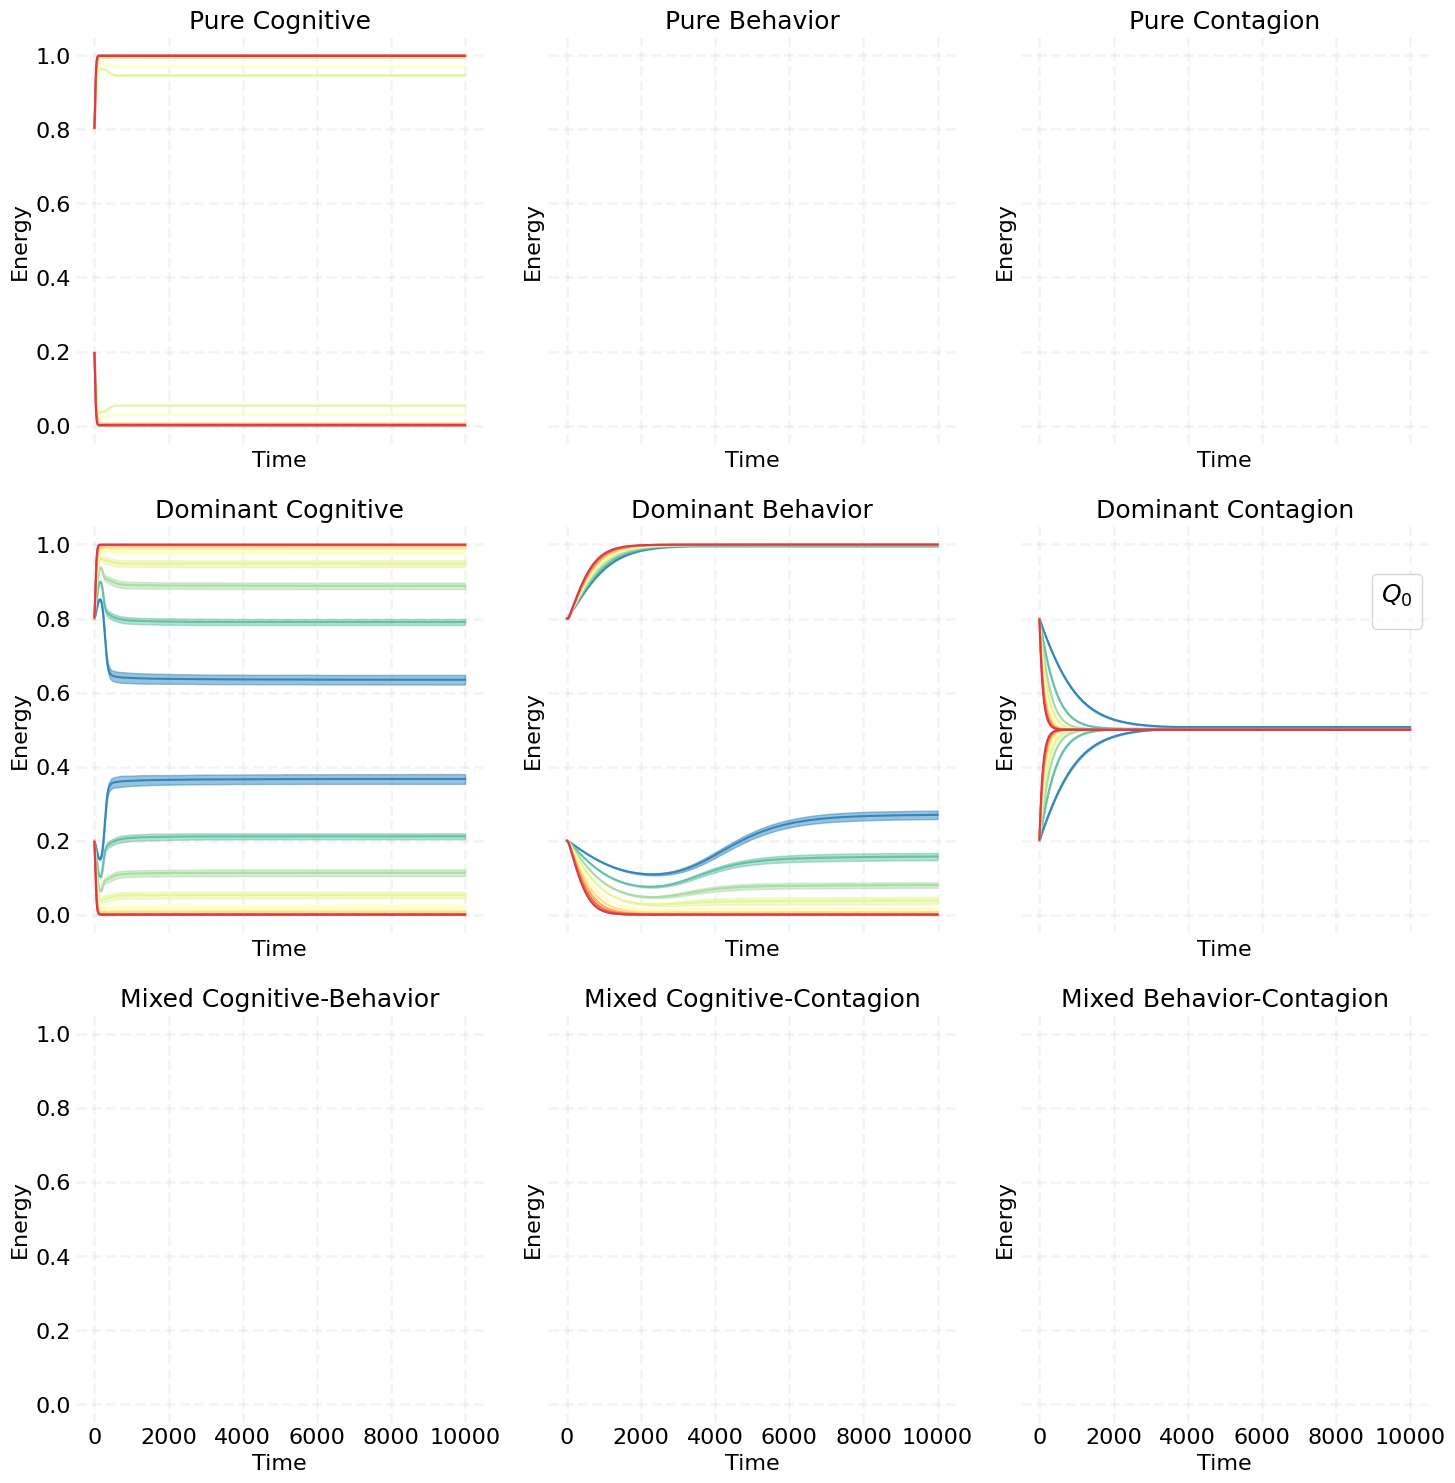

In [6]:
fig, ax = plt.subplots(
    len(conf["points"]),
    len(conf["points"][0]),
    figsize=(6 * len(conf["points"][0]), 6 * len(conf["points"])),
    sharex=True,
    sharey=True
)

cmap = plt.get_cmap("Spectral")
# fig.patch.set_facecolor('white')
for row_id, row in enumerate(conf["points"]):
    for column_id, point in enumerate(row):
        model_path = f"p{'-'.join(str(np.round(p,2)) for p in point)}_b{conf['beta']}_sd{conf['sim_dur']}"

        patches = []
        for a in conf["a_s"]:
            dyn_data_path = os.path.join(
                conf["base_path"], "raw_data", conf["dyn_path"], conf_path, str(a), model_path
            )
            try:
                files = os.listdir(dyn_data_path)
                data_files = {}

                for idx, file in enumerate(files):
                    # Opening JSON file
                    with open(os.path.join(dyn_data_path, file), "r") as f:
                        # returns JSON object as
                        # a dictionary
                        data_files[idx] = json.load(f)

                non_lonely_mean = []
                lonely_mean = []
                non_lonely_std = []
                lonely_std = []

                for df in data_files:
                    non_lonely_mean.append(data_files[df]["non_lonely_mean"])
                    lonely_mean.append(data_files[df]["lonely_mean"])
                    non_lonely_std.append(data_files[df]["non_lonely_std"])
                    lonely_std.append(data_files[df]["lonely_std"])

                # Uncomment if you want variability between files
                plot_timeseries(ax[row_id, column_id], np.array(non_lonely_mean), a, cmap=cmap)
                plot_timeseries(ax[row_id, column_id], np.array(lonely_mean), a, cmap=cmap)

                # Uncomment if you want mean variability within simulations
                # plot_timeseries(ax[row_id, column_id], np.array(non_lonely_mean), a, data_std=np.array(non_lonely_std))
                # plot_timeseries(ax[row_id, column_id], np.array(lonely_mean), a, data_std=np.array(lonely_std))

                patches.append(mpatches.Patch(color=cmap(norm(a)), label=a))
            except FileNotFoundError as e:
                print(e)
            except ValueError as e:
                print(e)
            gf.set_frame(ax=ax[row_id, column_id], major_alpha=0.2)
            ax[row_id, column_id].set_box_aspect(1)
            set_labels_and_titles(
                ax=ax[row_id, column_id],
                title=f"{point_dict[str(point)]}",
                xlabel="Time",
                ylabel="Energy",
                tick_size=16,
                label_size=16,
                title_size=18,
            )

ax[1,2].legend(handles=patches, prop={'size': 16}, bbox_to_anchor=(1.01, .91), title=r"$Q_0$", title_fontsize=18)
plt.subplots_adjust(wspace=0.05, hspace=0.2)
plt.savefig("./results/dyn_e_v2.png", dpi=300)
plt.show()


# Pearson t0 tt (@paper)

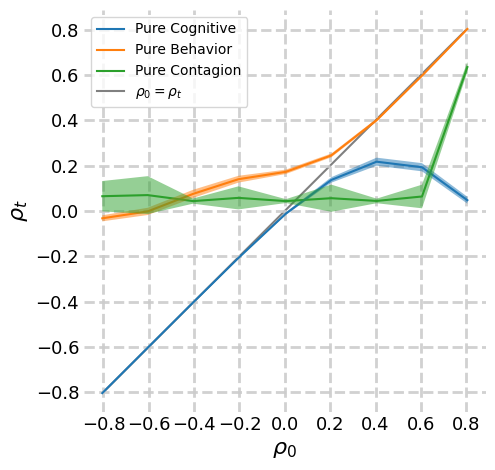

In [72]:
fig, ax = plt.subplots(1, 1)

pearsons = {}
for row_id, point in enumerate(conf["points"][0]):
    # for column_id, point in enumerate(row):
    model_path = f"p{'-'.join(str(np.round(p,2)) for p in point)}_b{conf['beta']}_sd{conf['sim_dur']}"
    point = str(point)
    pearsons.setdefault(point, {"x": [], "y": [], "std": []})
    patches = []
    for a in conf["a_s"]:
        dyn_data_path = os.path.join(
            conf["base_path"], conf["dyn_path"], conf_path, str(a), model_path
        )

        x, y = [], []
        for idx, file in enumerate(os.listdir(dyn_data_path)):
            # Opening JSON file
            with open(os.path.join(dyn_data_path, file), "r") as f:
                d = json.load(f)
                x.append(d["pearsons"][0])
                y.append(d["pearsons"][-1])
        # x = np.array(x)
        # y = np.array(y)
        pearsons[point]["x"].append(np.mean(x))
        pearsons[point]["y"].append(np.mean(y))
        pearsons[point]["std"].append(np.std(y))

    ax.plot(pearsons[point]["x"], pearsons[point]["y"], label=f"{point_dict[str(point)]}")
    ax.fill_between(
        pearsons[point]["x"],
        np.array(pearsons[point]["y"]) - np.array(pearsons[point]["std"]),
        np.array(pearsons[point]["y"]) + np.array(pearsons[point]["std"]),
        zorder=10,
        alpha=0.5,
    )

diagonal = np.linspace(-.8, .8, 40)
plt.plot(diagonal, diagonal, color="gray", zorder=-10, label=r"$\rho_0=\rho_t$")

plt.legend()
gf.set_frame(ax=ax)
ax.set_box_aspect(1)
set_labels_and_titles(
    ax=ax,
    title=f"",
    xlabel=r"$\rho_0$",
    ylabel=r"$\rho_t$",
    tick_size=13,
    label_size=16,
    title_size=18,
)
plt.tight_layout()
plt.show()


# Graph DOS

## Degree distribution over degree of separation

In [131]:
import networkx as nx

def plot_grid(ax, G, with_labels=False, title='', cmap_name="viridis"):
    """Plot grid network.

    Parameters
    ----------
    ax : matplotlib.axis
        Matplotlib axis to plot in.
    G : nx.DiGraph
        Directed networkx graph
    with_labels : boolean
        True or false boolean on whether or not to show labels.
        (Default value = False)
    title : str
        Title of the plot. (Default value = '')

    Returns
    -------
    None

    """
    cmap = plt.get_cmap(cmap_name)
    norm = mcolors.Normalize(vmin=0, vmax=1)
    pos = nx.nx_agraph.graphviz_layout(G, prog="neato")

    sizes = [50 for node in G.nodes]
    colors = [cmap(norm(G.nodes[node]["e"])) for node in G.nodes]
    nx.draw(
        G,
        pos,
        node_size=sizes,
        edge_color='gray',
        node_color=colors,
        with_labels=with_labels,
        alpha=0.9,
        font_size=14,
        ax=ax)
    ax.set_title(title)
    return

fig, ax = plt.subplots(2,5, figsize=(20,8))
for i, a in enumerate([0.8,.6,.4,.2,0,-.8,-.6,-.4,-.2]):
    G = nx.read_gml(f"input/t0_graphs/barabasi_albert-[0.2, 0.8]es-500n-11p/{a}/0.gml")
    if i < 5:
        plot_grid(ax[0, i], G)
        ax[0, i].set_title(a)
    else:
        plot_grid(ax[1, i%5], G)
        ax[1, i%5].set_title(a)
plt.savefig("results/graphs_over_a.png")
plt.show()
    

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x14a8d65f0> (for post_execute):


KeyboardInterrupt: 

In [7]:
G, _ = focussed_assort_network_gen(
    0.2,
    [0.2, 0.8],
    50,
    11,
    network_gen_fn=barabasi_albert,
)

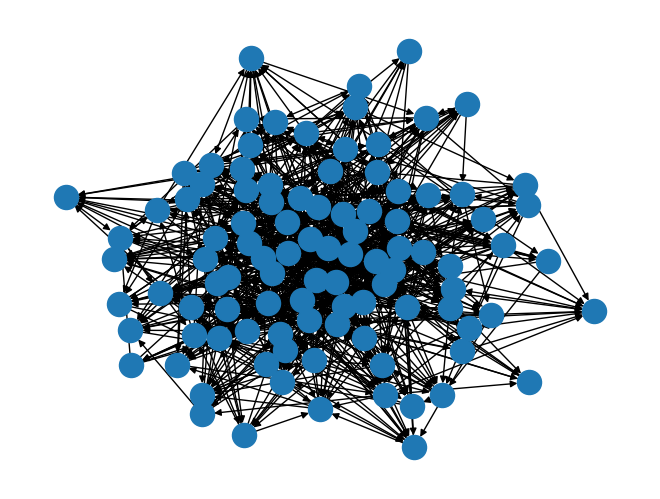

In [8]:
nx.draw(G)

In [91]:
def focussed_assort_networks_gen(
    aim_assort_values,
    e_groups,
    n_per_group,
    p_rel,
    network_gen_fn=barabasi_albert,
    max_rec=100,
    cur_rec=0,
    debug=False,
):
    G_list = []
    p_list = []
    G, component_links = fully_assortative_network(
        e_groups, n_per_group, p_rel, network_gen_fn
    )

    if 1.0 in aim_assort_values:
        G_list.append(G.copy())
        p_list.append(1.0)
        if len(G_list) == len(aim_assort_values):
            return G_list

    # Generate default network
    p = np.round(pearson(G), 2) + 0.0
    avg_degree = calc_avg_degree(G)

    if debug:
        ps = [p]

    rand_component_links = component_links.sample(frac=1)
    for _, row in rand_component_links.iterrows():
        G.remove_edges_from([row[e_groups[0]], row[e_groups[1]]])
        G.add_edge(row[e_groups[0]][0], row[e_groups[1]][1])
        G.add_edge(row[e_groups[1]][0], row[e_groups[0]][1])

        # Calculate pearson and store graph if needed
        p = np.round(pearson(G), 2) + 0.0
        if debug:
            ps.append(p)

        if p in aim_assort_values and p not in p_list:
            if debug:
                print(ps)
                plt.plot(ps)
                plt.show()
                
            assert (
                calc_avg_degree(G) == avg_degree
            ), f"Average degree changed from {calc_avg_degree(G)} to {avg_degree}, please check rewiring."
            print(f"adding {p=}")
            G_list.append(G.copy())
            p_list.append(p)
            if len(G_list) == len(aim_assort_values):
                return G_list

    if debug:
        print(ps)
        plt.plot(ps)
        plt.show()
    if cur_rec == max_rec:
        raise Exception("Exceeded max recursion.")

    assert (
        calc_avg_degree(G) == avg_degree
    ), f"Average degree changed from {calc_avg_degree(G)} to {avg_degree}, please check rewiring."
    return focussed_assort_networks_gen(
        aim_assort_values,
        e_groups,
        n_per_group,
        p_rel,
        network_gen_fn=network_gen_fn,
        cur_rec=cur_rec + 1,
        max_rec=max_rec,
    )

In [11]:
Gs

(<networkx.classes.digraph.DiGraph at 0x1451eed40>,
             0.2         0.8
 0      (00, 01)    (10, 11)
 1      (00, 03)    (10, 13)
 2      (00, 05)    (10, 15)
 3      (00, 07)    (10, 17)
 4      (00, 09)    (10, 19)
 ..          ...         ...
 424  (037, 048)  (137, 148)
 425   (038, 06)   (138, 16)
 426  (038, 025)  (138, 125)
 427  (038, 045)  (138, 145)
 428  (038, 049)  (138, 149)
 
 [429 rows x 2 columns])

adding p=0.8
adding p=0.6
adding p=0.4
adding p=0.2


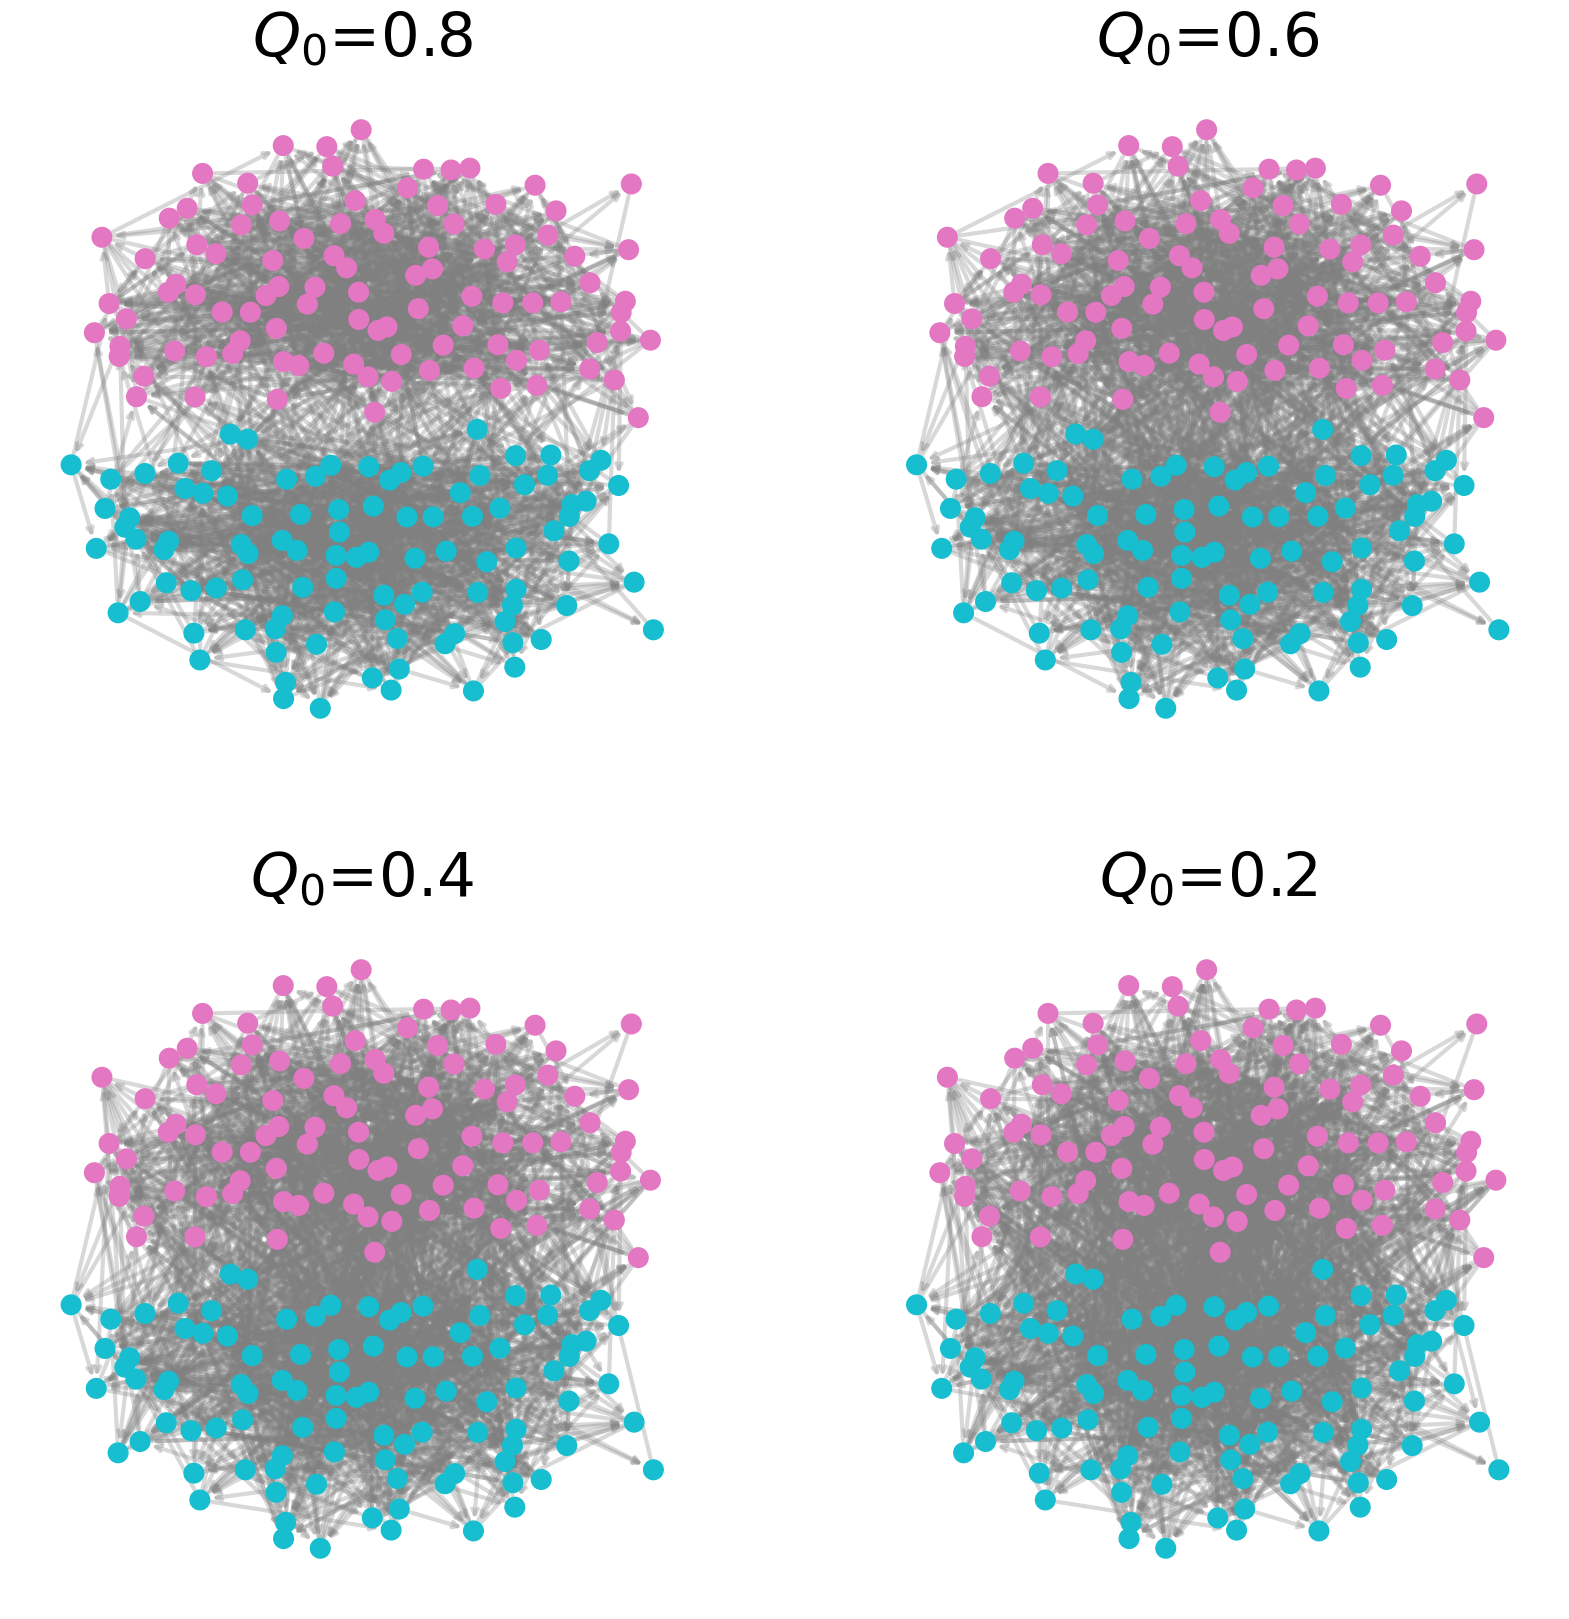

In [93]:
def plot_fig(ax, G, pos):
    # pos = nx.nx_agraph.graphviz_layout(G, prog="neato")
    # pos = nx.circular_layout(G)
    colors = [cmap(norm(G.nodes[node]["e"])) for node in G.nodes]
    nx.draw_networkx_nodes(G, pos=pos, node_color=colors, node_size=200, ax=ax)
    nx.draw_networkx_edges(G, pos=pos, arrows=True, arrowstyle='->', 
                        edge_color="gray", alpha=0.3, width=3, ax=ax)
    # Remove box around figure
    for spine in ("top", "right", "bottom", "left"):
        ax.spines[spine].set_visible(False)

fig, axs = plt.subplots(2,2, figsize=(20,20))
a_s = [0.8,.6,.4,.2]
Gs = focussed_assort_networks_gen(a_s, [0.2,0.8], 100, 11)
pos = nx.nx_agraph.graphviz_layout(Gs[0], prog="neato")
for i, G in enumerate(Gs):
    if i < 2:
        plot_fig(axs[0, i], G, pos)
        axs[0, i].set_title(rf"$Q_0$={a_s[i]}", size=44)
    else:
        plot_fig(axs[1, i%2], G, pos)
        axs[1, i%2].set_title(rf"$Q_0$={a_s[i]}", size=44)
plt.savefig("./results/assort_sampling.png", dpi=300)


Text(0.5, 1.0, '$\\rho_0=0.8$')

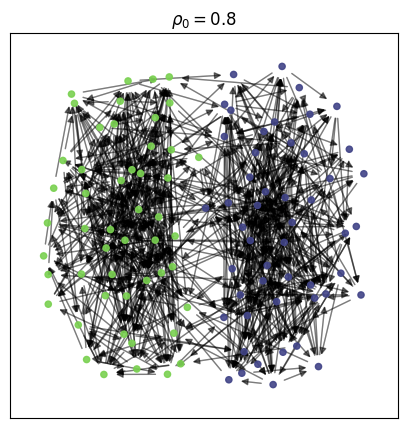

In [148]:
# G = nx.read_gml(f"input/t0_graphs/barabasi_albert-[0.2, 0.8]es-500n-11p/0.8/0.gml")
fig,ax = plt.subplots(1,1,figsize=(5,5))
cmap = plt.get_cmap("viridis")
norm = mcolors.Normalize(vmin=0, vmax=1)
pos = nx.nx_agraph.graphviz_layout(G, prog="neato")
# pos = nx.circular_layout(G)
sizes = [20] * len(G.nodes)
colors = [cmap(norm(G.nodes[node]["e"])) for node in G.nodes]
nx.draw_networkx_nodes(
    G,
    pos,
    node_size=sizes,
    node_color=colors,
    alpha=0.9,
    ax=ax)
[nx.draw_networkx_edges(G,pos=pos,edgelist=[edge],alpha=0.3,width=1) for edge in G.edges]
# nx.draw_networkx_edges(G,pos=pos,edgelist=G.edges,alpha=0.3,width=1, ax=ax)
ax.set_title(r"$\rho_0=0.8$")

In [15]:
s, df = dos_df(dos_neighbors(G, depth=4), check_lonely(G))

In [23]:
for i in range(9):
    print(i%5)

0
1
2
3
4
0
1
2
3


In [45]:
model_path = f"p{'-'.join(str(np.round(p,2)) for p in [0,1,0])}_b{conf['beta']}_sd{conf['sim_dur']}"
t0_assort_dir_path = os.path.join(
    conf["base_path"], conf["tt_path"], conf_path, str(-0.6), model_path
)
files = os.listdir(t0_assort_dir_path)
G = nx.read_gml(os.path.join(t0_assort_dir_path, files[0]))


In [46]:
dn = dos_neighbors(G, depth=5)


In [47]:
dos_degrees = [[len(dn[node][degree]) for degree in dn[node]] for node in dn]


array([[ 1.       , -0.0328006],
       [-0.0328006,  1.       ]])

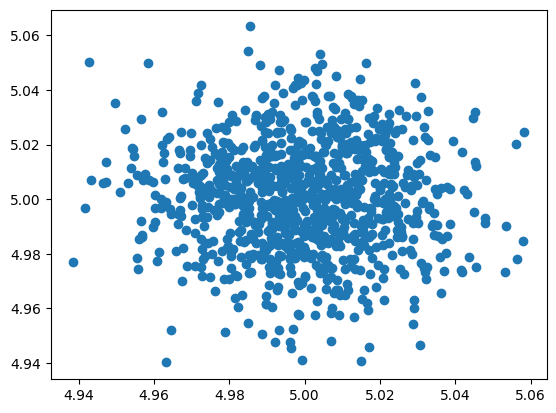

In [63]:
a = np.random.normal(5, 0.02, 1000)
b = np.random.normal(5, 0.02, 1000)
plt.scatter(a,b)
np.corrcoef(a, b)

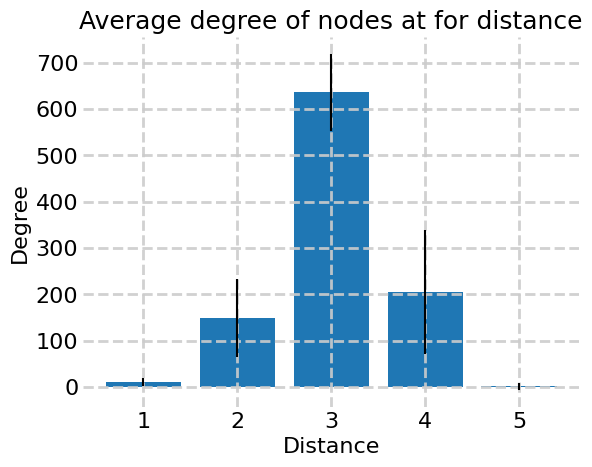

In [48]:
fig, ax = plt.subplots(1, 1)
ax.bar(
    list(range(1, 6)),
    np.array(dos_degrees).mean(axis=0),
    yerr=np.array(dos_degrees).std(axis=0),
)
gf.set_frame(ax=ax)
set_labels_and_titles(
    ax=ax,
    title=f"Average degree of nodes at for distance",
    xlabel=r"Distance",
    ylabel=r"Degree",
    tick_size=16,
    label_size=16,
    title_size=18,
)


## DOS metric

In [73]:
def get_threshold_dos(tdata):
    test_gdf = tdata.copy()
    test_gdf.replace([np.inf, -np.inf], np.nan, inplace=True)
    tmp = (
        test_gdf[(test_gdf["ego_e"] < 0.5) & (test_gdf["dos"] < 5)]
        .dropna(subset=["dos_metric"])
        .groupby("dos")
        .mean(numeric_only=True)
        .reset_index()
    )
    return tmp[tmp["dos_metric"] < 0]["dos"].min() - 1


# Dos degree (@paper)

In [74]:
conf["sim_dur"] = 10000

In [10]:
from collections import Counter


def dos_df(dos_n, energies, dos_depth=6, states=[0, 1]):
    """Calculates per node their propensity to align with others at a certain
    degree of separation.

    Args:
        dos_n (pd.DataFram): Keeps a record of all the nodes neighbors at
        all distances.
        energies (dict): A dictionary with all nodes as keys, and their group (0, or 1) as values.
        states (list, optional): States in which the nodes can be. Defaults to [0, 1].

    Returns:
        pd.DataFrame: Dataframe with all nodes and their respective propensities at different
        distances.
    """
    df = {"ego": [], "dos": [], "ego_e": [], "n_neighbors": []}
    for node in dos_n:
        for degree in dos_n[node]:
            df["ego"].append(node)
            df["dos"].append(degree)
            # all nodes under threshold energy == 0, otherwise 1.
            # Threshold defaults to .4
            df["ego_e"].append(energies[node])
            energies_neighbors = [energies[n] for n in dos_n[node][degree]]
            df["n_neighbors"].append(len(energies_neighbors))
            for k in states:
                # Count how many neighbors conform to own state, and those who don't.
                count = Counter(energies_neighbors)
                df.setdefault(f"alter_e{k}", [])
                df[f"alter_e{k}"].append(count.get(k, 0))
    # Calculate how many people have minimal energy
    counts = Counter(energies.values())
    n_min_energy = min(list(counts.keys()))
    # Calculate population ratio of minimal energy individuals
    expected_fraction_lonely = counts[n_min_energy] / len(energies)
    # Setup resulting dataframe with the dos_metric
    df = pd.DataFrame(df)
    df["alter_fraction_e0"] = df["alter_e0"] / df["n_neighbors"]
    df["difference_random"] = (df["alter_fraction_e0"] / expected_fraction_lonely) - 1
    df["dos_metric"] = df["difference_random"].div(
        df.groupby(["ego"])["difference_random"].transform("first").abs()
    )

    df.replace([np.inf, -np.inf], 0, inplace=True)
    grouped = (
        df[(df["ego_e"] < 0.5) & (df["dos"] < dos_depth+1)]
        .groupby("dos")
        .mean(numeric_only=True)
        .reset_index()
    )
    try:
        dos_metric = (
            grouped["difference_random"]
            .div(float(grouped[grouped["dos"] == 1]["difference_random"].abs()))
            .to_list()
        )
        if len(dos_metric) == []:
            print("gaat mis in try",grouped)
    except TypeError:
        dos_metric = [0] * dos_depth
        if len(dos_metric) == []:
            print("gaat mis in except",dos_metric, dos_depth)
    return df, dos_metric
conf["base_path"] = "modularity_check_graphs"
conf["a_s"] = [0.0, 0.2, 0.4, 0.6]
dos_data = {}
for sim_dur in [10000]:
    conf["sim_dur"] = sim_dur
    dos_data.setdefault(sim_dur, {})
    points = [[1,0,0],[0,1,0],[0,0,1]]
    # fig, ax = plt.subplots(1,1,figsize=(6,4))
    for point in points:
        a_data = {}
        full_data = {}
        for a in conf["a_s"]:
            model_path = f"p{'-'.join(str(np.round(p,2)) for p in point)}_b{conf['beta']}_sd{conf['sim_dur']}"
            t0_assort_dir_path = os.path.join(
                conf["base_path"], conf["tt_path"], conf_path, str(a), model_path
            )
            files = os.listdir(t0_assort_dir_path)

            data = []

            for file in files:
                G = nx.read_gml(os.path.join(t0_assort_dir_path, file))
                _, df = dos_df(dos_neighbors(G, depth=6), check_lonely(G))
                data.append(df)
            # print(data)
            a_data[a] = np.nanmean(np.array(data), axis=0)
            full_data[a] = np.array(data)

        doss = {a: [np.argmax(s<0) for s in full_data[a]] for a in full_data}
        means = []
        stds = []
        mins = []
        maxs = []
        for a in conf["a_s"]:
            means.append(np.mean(doss[a]))
            stds.append(np.std(doss[a]))
            mins.append(np.min(doss[a]))
            maxs.append(np.max(doss[a]))
        means = np.array(means)
        stds = np.array(stds)
        mins = np.array(mins)
        maxs = np.array(maxs)

        point = str(point)
        dos_data[sim_dur].setdefault(point, {})
        dos_data[sim_dur][point]["means"] = means
        dos_data[sim_dur][point]["stds"] = stds
        dos_data[sim_dur][point]["mins"] = mins
        dos_data[sim_dur][point]["maxs"] = maxs


    # ax.plot(conf["a_s"], means, label=f"{point_dict[str(point)]}")
    # ax.fill_between(conf["a_s"], means-stds, means+stds, zorder=-10, alpha=0.5)
    # ax.fill_between(conf["a_s"], mins, maxs, zorder=-10, alpha=0.5)
# plt.legend()
# gf.set_frame(ax)
# ax.set_ylim(0,3.4)
# set_labels_and_titles(ax, "", r"$\rho_0$", "Critical degree of peer influence", label_size=15, tick_size=15)


In [8]:
dos_data[10000].keys()

dict_keys(['[1, 0, 0]', '[0, 1, 0]', '[0, 0, 1]'])

In [10]:
for r in dos_data:
    for point in dos_data[r]:
        for metric in dos_data[r][point]:
            dos_data[r][point][metric]
            dos_data[r][point][metric] = np.array(dos_data[r][point][metric])

In [5]:
dos_data = {100: {'[1, 0, 0]': {'means': [3.0, 3.0, 2.0, 2.0, 1.3, 0.0, 0.0, 0.0, 0.0],
   'stds': [0.0, 0.0, 0.0, 0.0, 1.2688577540449522, 0.0, 0.0, 0.0, 0.0],
   'mins': [3.0, 3.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0],
   'maxs': [3.0, 3.0, 2.0, 2.0, 5.0, 0.0, 0.0, 0.0, 0.0]},
  '[0, 1, 0]': {'means': [3.0, 3.0, 2.0, 2.0, 1.3, 0.0, 0.0, 0.0, 0.0],
   'stds': [0.0, 0.0, 0.0, 0.0, 1.2688577540449522, 0.0, 0.0, 0.0, 0.0],
   'mins': [3.0, 3.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0],
   'maxs': [3.0, 3.0, 2.0, 2.0, 5.0, 0.0, 0.0, 0.0, 0.0]},
  '[0, 0, 1]': {'means': [3.0, 3.0, 2.0, 2.0, 1.65, 0.0, 0.0, 0.0, 0.0],
   'stds': [0.0, 0.0, 0.0, 0.0, 1.2757350822173072, 0.0, 0.0, 0.0, 0.0],
   'mins': [3.0, 3.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0],
   'maxs': [3.0, 3.0, 2.0, 2.0, 3.0, 0.0, 0.0, 0.0, 0.0]}},
 1000: {'[1, 0, 0]': {'means': [1.4, 2.0, 2.0, 2.0, 0.3, 0.0, 0.0, 0.0, 0.0],
   'stds': [0.9165151389911679,
    0.0,
    0.0,
    0.0,
    0.7810249675906654,
    0.0,
    0.0,
    0.0,
    0.0],
   'mins': [0.0, 2.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0],
   'maxs': [2.0, 2.0, 2.0, 2.0, 3.0, 0.0, 0.0, 0.0, 0.0]},
  '[0, 1, 0]': {'means': [3.0, 3.0, 2.0, 2.0, 1.35, 0.0, 0.0, 0.0, 0.0],
   'stds': [0.0, 0.0, 0.0, 0.0, 1.3143439428094914, 0.0, 0.0, 0.0, 0.0],
   'mins': [3.0, 3.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0],
   'maxs': [3.0, 3.0, 2.0, 2.0, 5.0, 0.0, 0.0, 0.0, 0.0]},
  '[0, 0, 1]': {'means': [3.0, 3.0, 2.1, 2.25, 2.2, 2.0, 2.0, 2.0, 2.0],
   'stds': [0.0,
    0.0,
    0.3,
    0.4330127018922193,
    0.39999999999999997,
    0.0,
    0.0,
    0.0,
    0.0],
   'mins': [3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0],
   'maxs': [3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0]}},
 10000: {'[1, 0, 0]': {'means': [1.0, 2.0, 2.0, 2.0, 0.3, 0.0, 0.0, 0.0, 0.0],
   'stds': [1.0, 0.0, 0.0, 0.0, 0.7810249675906654, 0.0, 0.0, 0.0, 0.0],
   'mins': [0.0, 2.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0],
   'maxs': [2.0, 2.0, 2.0, 2.0, 3.0, 0.0, 0.0, 0.0, 0.0]},
  '[0, 1, 0]': {'means': [3.0, 2.95, 2.15, 0.95, 0.05, 0.0, 0.0, 0.0, 0.0],
   'stds': [0.0,
    0.21794494717703367,
    0.3570714214271425,
    0.4974937185533101,
    0.21794494717703364,
    0.0,
    0.0,
    0.0,
    0.0],
   'mins': [3.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
   'maxs': [3.0, 3.0, 3.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0]},
  '[0, 0, 1]': {'means': [2.05, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.0],
   'stds': [0.21794494717703367,
    0.21794494717703364,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.21794494717703364,
    0.0],
   'mins': [2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
   'maxs': [3.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]}}}

In [6]:
with open("DOS_data.json", "w") as outfile:
    json.dump(dos_data, outfile)

In [6]:
# Opening JSON file
f = open('DOS_p_data_v2_full.json')
  
# returns JSON object as 
# a dictionary
dos_data = json.load(f)

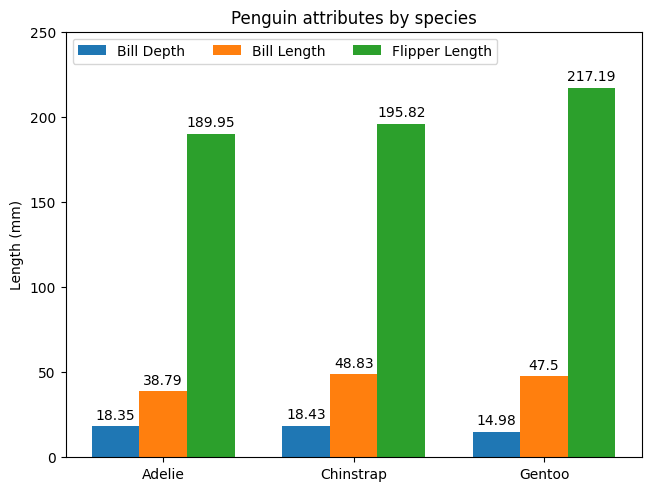

In [7]:
import matplotlib.pyplot as plt
import numpy as np

species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

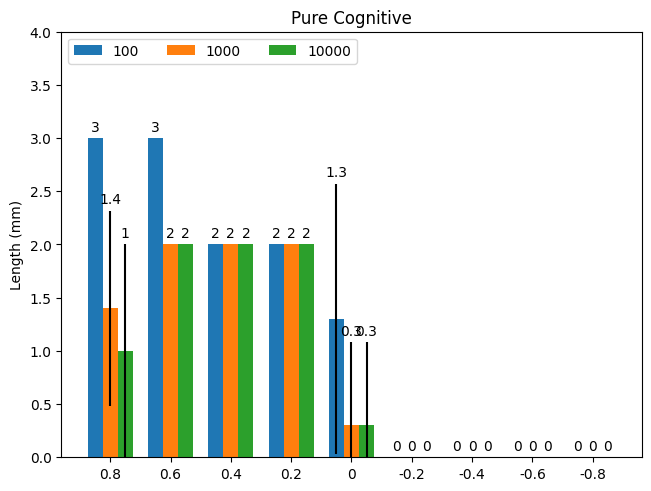

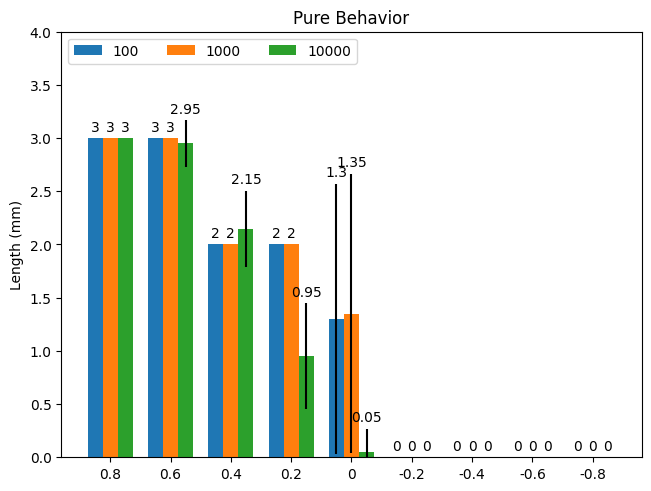

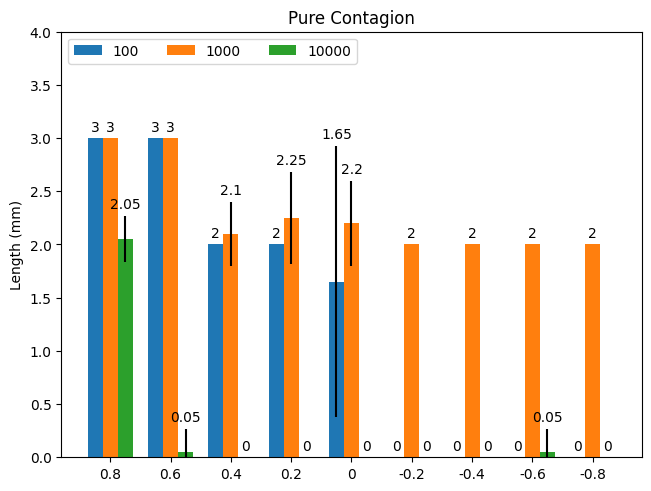

In [8]:
import matplotlib.pyplot as plt
import numpy as np

for point in dos_data[100].keys():
    species = conf["a_s"]
    penguin_means = {t:dos_data[t][point]["means"] for t in dos_data.keys()}
    penguin_stds = {t:dos_data[t][point]["stds"] for t in dos_data.keys()}

    x = np.arange(len(species))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in penguin_means.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute, yerr=penguin_stds[attribute])
        ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Length (mm)')
    ax.set_title(f'{point_dict[point]}')
    ax.set_xticks(x + width, species)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0, 4)

    plt.show()

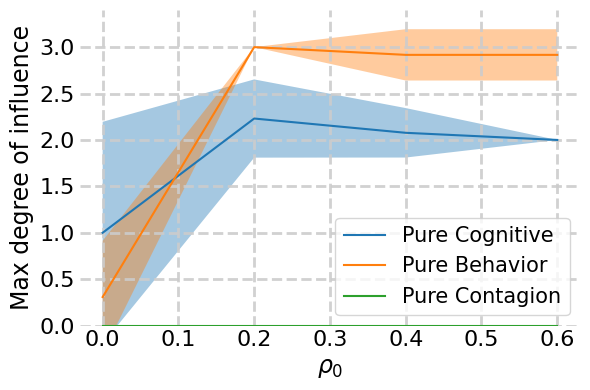

In [11]:
sim_durs = [10000]
for sim_dur in sim_durs:
    fig, ax = plt.subplots(1,1, figsize=(6,4))

    set_labels_and_titles(ax, "", r"$\rho_0$", "Critical degree of peer influence", label_size=20, tick_size=18)  
    for point in dos_data[sim_dur]:
        means = dos_data[sim_dur][point]["means"]
        stds = dos_data[sim_dur][point]["stds"]
        ax.plot(conf["a_s"], means, label=f"{point_dict[str(point)]}")
        ax.fill_between(conf["a_s"], means-stds, means+stds, zorder=-10, alpha=0.4)
    ax.set_ylim(0,3.4)
    gf.set_frame(ax)
    # if idx > 0:
    set_labels_and_titles(ax, f"", r"$\rho_0$", "Max degree of influence", label_size=17, tick_size=16)

    plt.legend(prop={'size': 15})
    plt.tight_layout()
    plt.savefig(f"./results/dos_degrees_{sim_dur}.png", dpi=300)

# Single DOS (@paper)

In [6]:
model_path = f"p{'-'.join(str(np.round(p,2)) for p in [0.0,1.0,0.0])}_b{conf['beta']}_sd{conf['sim_dur']}"
tt_assort_dir_path = os.path.join(
    conf["base_path"], conf["raw_data"], conf["tt_path"], conf_path, str(0.8), model_path
)
files = os.listdir(tt_assort_dir_path)

dos_d = []
for file in files:
    G = nx.read_gml(os.path.join(tt_assort_dir_path, file))
    _, df = dos_df(dos_neighbors(G), check_lonely(G))
    grouped = (
        _[(_["ego_e"] < 0.5) & (_["dos"] < 6+1)]
        .groupby("dos")
        .mean(numeric_only=True)
        .reset_index())
    dos_d.append(grouped["difference_random"].to_list())

KeyboardInterrupt: 

In [ ]:
dos_d = np.array(dos_d)[:,:5]
fig, ax = plt.subplots(1,1, figsize=(6,4))
plt.bar(list(range(1,5)), np.mean(dos_d, axis=0), yerr=np.std(dos_d, axis=0), zorder=100)
gf.set_frame(ax)
plt.xticks([1,2,3,4])
set_labels_and_titles(ax, "", r"Degree of separation", "Increase probability\nof alignment", tick_size=18, label_size=18)
plt.tight_layout()
ax.set_ylim(-1, 1)
plt.savefig("./results/dos_example.png", dpi=300)

# Pearson over distance

In [6]:

model_path = f"p{'-'.join(str(np.round(p,2)) for p in [0,1,0])}_b{conf['beta']}_sd{conf['sim_dur']}"
tt_assort_dir_path = os.path.join(
    conf["base_path"], conf["tt_path"], conf_path, str(0.8), model_path
)
files = os.listdir(tt_assort_dir_path)

dos_d = []
ps = {d:[] for d in range(1,5)}
for file in files:
    G = nx.read_gml(os.path.join(tt_assort_dir_path, file))

    links = {distance:[] for distance in range(1,5)}
    dn = dos_neighbors(G)
    for node in dn:
        for distance in dn[node]:
            for neighbor in dn[node][distance]:
                links[distance].append([G.nodes[node]["e"],G.nodes[neighbor]["e"]])
    
    for d in links:
        energy_links = np.array(links[d])

        if np.all(energy_links[:, 0] == energy_links[:, 0][0]) and np.all(
            energy_links[:, 1] == energy_links[:, 1][0]
        ):
            corrcoef = [[1, 1], [1, 1]]
        else:
            import warnings

            with warnings.catch_warnings():
                warnings.filterwarnings("error")
                try:
                    corrcoef = np.corrcoef(energy_links[:, 0], energy_links[:, 1])
                except Warning as e:
                    print("error found:", e)
                    print(energy_links)
                    corrcoef = [[np.nan, np.nan], [np.nan, np.nan]]
                    raise Exception("Energy links were off, check this!")

        ps[d].append(list(map(lambda x: list(np.around(x,5,)),corrcoef,))[0][1])


FileNotFoundError: [Errno 2] No such file or directory: 'output/v2_data/tt_graphs/barabasi_albert-[0.2, 0.8]es-500n-11p/0.8/p0-1-0_b0.5_sd10000'

In [21]:
tt_assort_dir_path, t0_assort_dir_path

('output/tt_graphs/barabasi_albert-[0.2, 0.8]es-500n-11p/0.8/p0-1-0_b0.5_sd10000',
 'output/tt_graphs/barabasi_albert-[0.2, 0.8]es-500n-11p/0.8/p1-0-0_b0.5_sd10000')

[[1.         0.01318845]
 [0.01318845 1.        ]]


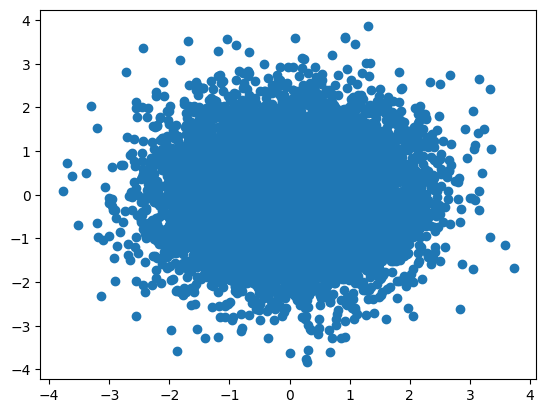

In [89]:
a = np.random.normal(size=10000)
b = np.random.normal(size=10000)
print(np.corrcoef(a,b))
plt.scatter(a,b)

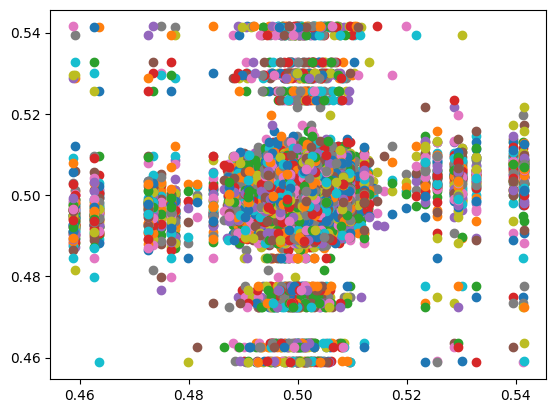

KeyboardInterrupt: 

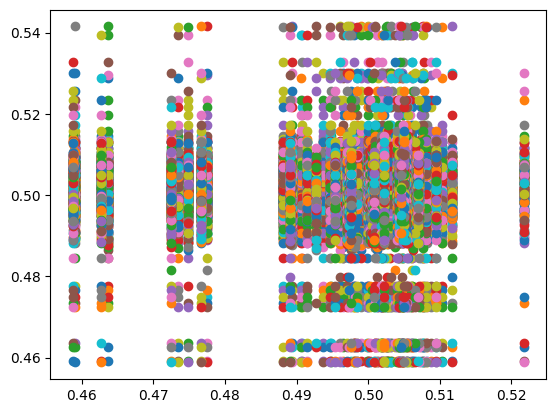

In [73]:
conf["base_path"] = "output"
conf["a_s"] = [-.8, -.6]
for sim_dur in [10000]:
    conf["sim_dur"] = sim_dur
    dos_data.setdefault(sim_dur, {})
    points = [[0,0,1]]
    # fig, ax = plt.subplots(1,1,figsize=(6,4))
    for point in points:
        dos_data[sim_dur].setdefault(str(point), {})
        for a in conf["a_s"]:
            dos_data[sim_dur][str(point)].setdefault(a, {})

            model_path = f"p{'-'.join(str(np.round(p,2)) for p in point)}_b{conf['beta']}_sd{conf['sim_dur']}"
            dir_path = os.path.join(
                conf["base_path"], conf["tt_path"], conf_path, str(a), model_path
            )
            files = os.listdir(dir_path)

            ps = {d:[] for d in range(1,5)}
            for file in files[:2]:
                G = nx.read_gml(os.path.join(dir_path, file))

                links = {distance:[] for distance in range(1,5)}
                dn = dos_neighbors(G)
                for node in dn:
                    for distance in dn[node]:
                        for neighbor in dn[node][distance]:
                            links[distance].append([G.nodes[node]["e"],G.nodes[neighbor]["e"]])
                for link in links:
                    for pair in links[link]:
                        plt.scatter(*pair)
                    plt.show()


In [19]:
def get_DOS(G):
    e_links = {distance:[] for distance in range(1,5)}
    DOS = {}
    dn = dos_neighbors(G)
    for node in dn:
        for distance in dn[node]:
            for neighbor in dn[node][distance]:
                e_links[distance].append([G.nodes[node]["e"],G.nodes[neighbor]["e"]])
    
    for d in e_links:
        energy_links = np.array(e_links[d])

        if np.all(energy_links[:, 0] == energy_links[:, 0][0]) and np.all(
            energy_links[:, 1] == energy_links[:, 1][0]
        ):
            corrcoef = [[1, 1], [1, 1]]
        else:
            import warnings

            with warnings.catch_warnings():
                warnings.filterwarnings("error")
                try:
                    corrcoef = np.corrcoef(energy_links[:, 0], energy_links[:, 1])
                except Warning as e:
                    print("error found:", e)
                    print(energy_links)
                    corrcoef = [[np.nan, np.nan], [np.nan, np.nan]]
                    raise Exception("Energy links were off, check this!")
        DOS[d] = list(map(lambda x: list(np.around(x,5,)),corrcoef,))[0][1]
    return DOS

In [18]:
# a = {1:2, 3:4}
# b = {1:[], 3:[]}
for k,v in a.items():
    b[k].append(v)
b

{1: [2, 2, 2, 2, 2, 2, 2, 2, 2], 3: [4, 4, 4, 4, 4, 4, 4, 4, 4]}

In [20]:
from networkx.exception import NetworkXError
conf["a_s"] = [-.8, -.6, -.4, -.2, 0, .2, .4, .6, .8]
dos_data = {}
for sim_dur in [10_000]:
    conf["sim_dur"] = sim_dur
    dos_data.setdefault(sim_dur, {})
    points = [[1.0,0.0,0.0],[0.0,1.0,0.0],[0.0,0.0,1.0]]
    for point in points:
        dos_data[sim_dur].setdefault(str(point), {})
        for a in conf["a_s"]:
            dos_data[sim_dur][str(point)].setdefault(a, {})

            model_path = f"p{'-'.join(str(np.round(p,2)) for p in point)}_b{conf['beta']}_sd{conf['sim_dur']}"
            dir_path = os.path.join(
                conf["base_path"], conf["raw_data"], conf["tt_path"], conf_path, str(a), model_path
            )
            files = os.listdir(dir_path)

            ps = {d:[] for d in range(1,5)}
            for file in files:
                try:
                    G = nx.read_gml(os.path.join(dir_path, file))
                except NetworkXError as e:
                    print(dir_path, file, e)

                for k,v in get_DOS(G).items():
                    ps[k].append(v)

            dos_data[sim_dur][str(point)][a] = ps

KeyboardInterrupt: 

In [34]:
a = [1,2,3,4,5,6]
a[4]


5

In [318]:
print(dir_path, file)
G = nx.read_gml(os.path.join(dir_path, file))

output/v2_data/tt_graphs/barabasi_albert-[0.2, 0.8]es-500n-11p/0/p1.0-0.0-0.0_b0.5_sd100 13.gml


NetworkXError: expected EOF, found 9 at (49036, 1)

In [69]:

print(dos_data["100"]["[0.0, 1.0, 0.0]"]["0.4"])
print(dos_data["1000"]["[0.0, 1.0, 0.0]"]["0.4"])
print(dos_data["10000"]["[0.0, 1.0, 0.0]"]["0.4"])

{'1': [0.40507, 0.40503, 0.40508, 0.40509, 0.40499, 0.40509, 0.40509, 0.4051, 0.40502, 0.40506, 0.40503, 0.40512, 0.40511, 0.40508, 0.40504, 0.40505, 0.40504, 0.40507, 0.40503, 0.40508], '2': [0.14218, 0.1381, 0.13948, 0.13727, 0.13255, 0.13088, 0.14127, 0.13726, 0.13148, 0.13473, 0.13412, 0.13812, 0.13475, 0.13564, 0.13237, 0.12827, 0.13364, 0.1297, 0.13523, 0.13145], '3': [-0.01408, -0.01221, -0.01419, -0.01288, -0.01177, -0.01152, -0.01404, -0.01193, -0.01369, -0.01407, -0.01236, -0.01453, -0.01246, -0.0119, -0.01298, -0.01192, -0.01183, -0.01281, -0.0134, -0.01171], '4': [-0.08872, -0.08673, -0.08799, -0.08366, -0.09109, -0.07964, -0.08565, -0.081, -0.08072, -0.07963, -0.08466, -0.08113, -0.0937, -0.08748, -0.08238, -0.07774, -0.08629, -0.07802, -0.08781, -0.08412]}
{'1': [0.42181, 0.41884, 0.42118, 0.42226, 0.41761, 0.42222, 0.42204, 0.42323, 0.41822, 0.42033, 0.41904, 0.42496, 0.42311, 0.4225, 0.4202, 0.41968, 0.4195, 0.4218, 0.4196, 0.42207], '2': [0.14626, 0.13986, 0.14252, 0.1

In [308]:
def get_root(data):
    tmp = np.array(list(data.values()))
    roots = []
    for file in range(len(tmp[0])):
        X, Y = list(range(1,5)), tmp[:,file]
        # Y[Y<0.05] = 0
        # undershoots = np.where(Y <= 0)[0]
        # print(undershoots)
        # Y = np.round(Y, 1)
        # Y[Y==0.] = 0.

        # if Y[0] <= 0:
        #     roots.append(0)
        #     continue

        # z, res, _, _, _ = np.polyfit(X[:undershoots[0]+1], Y[:undershoots[0]+1], 1, full=True)
        z, res, _, _, _ = np.polyfit(X, Y, 3, full=True)
        p = np.poly1d(z)
        
        roots.append(fsolve(p, [np.min(X), np.max(X)])[0])

        # print(roots[-1], Y) #,X[:undershoots[0]], Y[:undershoots[0]])
        # x = np.linspace(np.min(X), np.max(X), 100)
        # plt.plot(x, [p(t) for t in x])
        # plt.plot(X, Y)
        # plt.show()
    return roots

test_plot = {}
for point in dos_data[10_000]:
    test_plot.setdefault(point, {})
    for a in dos_data[10_000][point]:
        test_plot[point][a] = [get_root(dos_data[10_000][point][a])]

        


/usr/local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


In [348]:
df = pd.DataFrame(dos_data[sl][point][a]).T
df = df.round(r)
mDOIs = [df[df[col] <= 0].index[0] for col in df]
plot_data[sdur][point]["mean"].append(np.mean(mDOIs)-1)
plot_data[sdur][point]["std"].append(np.std(mDOIs))
display(df)
print(mDOIs)

0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
1  0.6  0.6  0.6  0.6  0.6  0.6  0.7  0.7  0.7  0.6  0.6  0.6  0.6  0.6  0.6   
2  0.4  0.5  0.4  0.5  0.5  0.5  0.5  0.5  0.5  0.4  0.4  0.4  0.5  0.5  0.5   
3  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1   
4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.5 -0.5 -0.5 -0.5 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4   

    15   16   17   18   19  
1  0.6  0.7  0.6  0.6  0.6  
2  0.4  0.5  0.4  0.4  0.5  
3  0.1  0.1  0.1  0.1  0.1  
4 -0.4 -0.5 -0.4 -0.4 -0.4

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [87]:
print(dos_data["10000"]['[0.0, 0.0, 1.0]']["0.8"])


{'1': [0.63143, 0.64894, 0.62593, 0.64611, 0.62645, 0.64627, 0.67166, 0.67327, 0.65209, 0.62565, 0.61854, 0.59228, 0.62433, 0.64595, 0.64308, 0.59271, 0.66869, 0.61572, 0.61158, 0.63595], '2': [0.44344, 0.46523, 0.44774, 0.45888, 0.45277, 0.46698, 0.48668, 0.4761, 0.47073, 0.44288, 0.44546, 0.41385, 0.45134, 0.45897, 0.47123, 0.41222, 0.48023, 0.44002, 0.43737, 0.4684], '3': [0.07445, 0.09133, 0.08082, 0.09457, 0.08626, 0.09056, 0.08715, 0.08933, 0.08933, 0.08999, 0.09205, 0.07824, 0.09427, 0.08292, 0.09098, 0.07154, 0.09296, 0.07313, 0.09088, 0.0936], '4': [-0.41802, -0.44609, -0.42158, -0.42697, -0.41845, -0.45996, -0.45897, -0.45839, -0.45958, -0.41535, -0.40587, -0.38943, -0.43412, -0.41942, -0.43508, -0.37792, -0.46099, -0.41701, -0.40936, -0.4376]}


In [ ]:
print(dos_data["10000"]['[0.0, 0.0, 1.0]']["0.8"])

[-0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8]
[-0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8]
[-0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8]


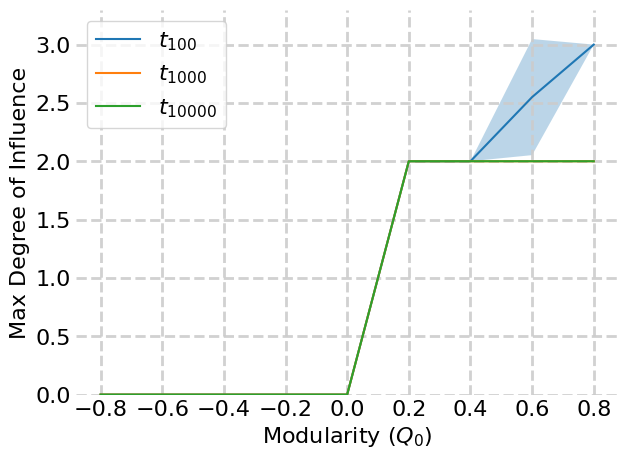

[-0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8]
[-0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8]
[-0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8]


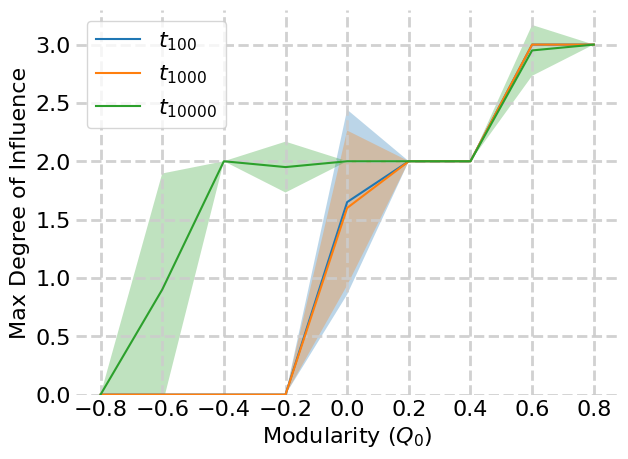

[-0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8]
[-0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8]
[-0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8]


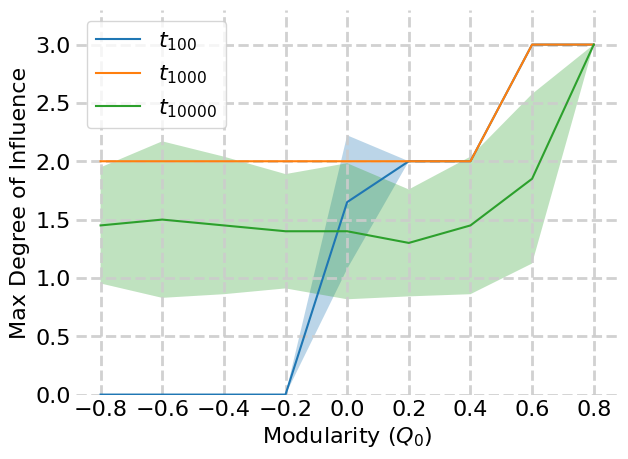

In [89]:
mDOI = {}
for sl in dos_data:
    for point in dos_data[sl]:
        mDOI.setdefault(point, {})
        mDOI[point].setdefault(sl, {})
        for a in dos_data[sl][point]:
            mDOI[point][sl].setdefault(a, [])
            df = pd.DataFrame(dos_data[sl][point][a]).T
            mDOIs = [int(df[df[col] <= 0].index[0]) for col in df]
            mDOI[point][sl][a] = mDOIs

for point in mDOI:
    fig, ax = plt.subplots(1,1,figsize=(7,5))
    for sl in mDOI[point]:
        x = [float(k) for k in mDOI[point][sl].keys()]
        x.sort()
        means = np.array([np.mean(mDOI[point][sl][m])-1 for m in mDOI[point][sl]])
        stds = np.array([np.std(mDOI[point][sl][m]) for m in mDOI[point][sl]])
        ax.plot(x, means, label=rf"$t_{{{sl}}}$")
        ax.fill_between(x, means-stds, means+stds, alpha=0.3)
    gf.set_frame(ax=ax)
    set_labels_and_titles(
        ax=ax,
        title=f"",
        xlabel=r"Modularity ($Q_0$)",
        ylabel=r"Max Degree of Influence",
        tick_size=16,
        label_size=16,
        title_size=18,
    )
    ax.set_ylim(0,3.3)
    gf.set_legend(ax, "upper left", size=16)
    plt.savefig(f"results/dos_degree_{point_dict[point].replace(' ', '_')}_over_time_pc.png", dpi=300)
    plt.show()

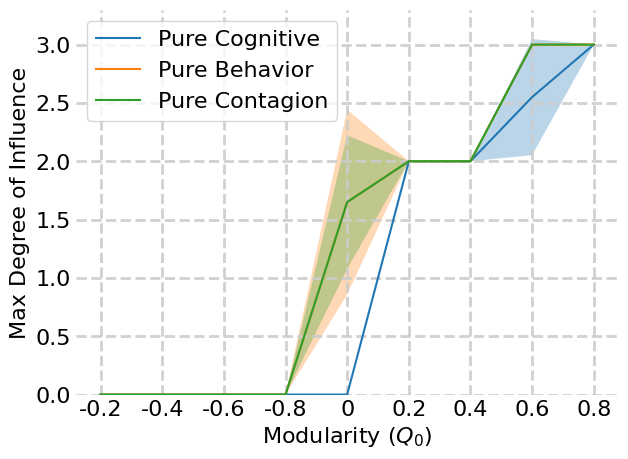

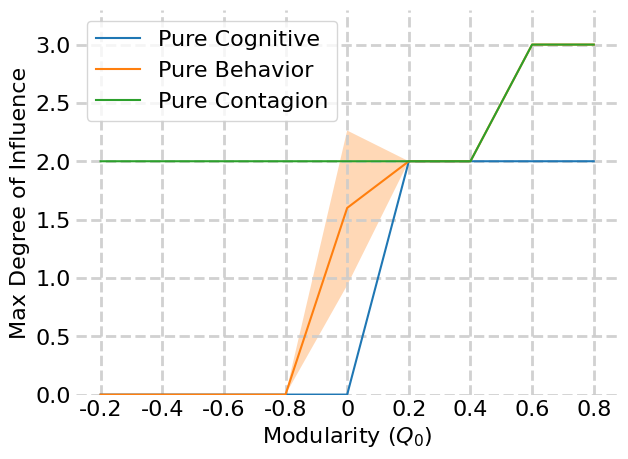

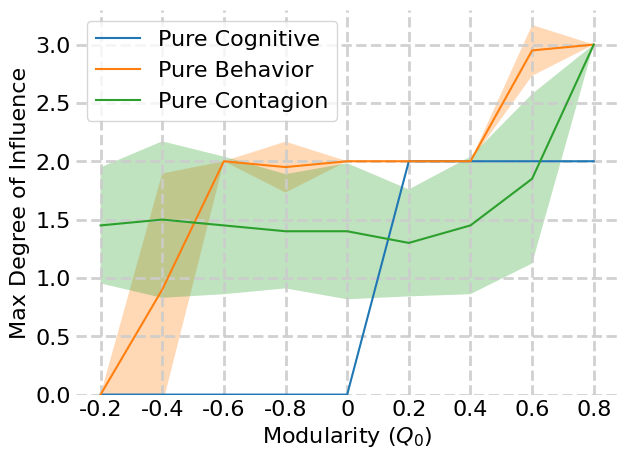

In [73]:
mDOI = {}
for sl in dos_data:
    mDOI.setdefault(sl, {})
    for point in dos_data[sl]:
        mDOI[sl].setdefault(point, {})
        for a in dos_data[sl][point]:
            mDOI[sl][point].setdefault(a, [])
            # for sim in range(len(dos_data[sl][point][a][1])):
            #     degree = 0
            #     for d in dos_data[sl][point][a]:
            #         if dos_data[sl][point][a][d][sim] <= 0:
            #             print(dos_data[sl][point][a][d][sim], d)
            #             degree = d
            #             continue
            df = pd.DataFrame(dos_data[sl][point][a]).T
            # df = df.round(2)
            mDOIs = [int(df[df[col] <= 0].index[0]) for col in df]
            mDOI[sl][point][a] = mDOIs

for sl in mDOI:
    fig, ax = plt.subplots(1,1,figsize=(7,5))
    for point in mDOI[sl]:
        x = list(mDOI[sl][point].keys())
        x.sort()
        means = np.array([np.mean(mDOI[sl][point][m])-1 for m in mDOI[sl][point]])
        stds = np.array([np.std(mDOI[sl][point][m]) for m in mDOI[sl][point]])
        ax.plot(x, means, label=point_dict[point])
        ax.fill_between(x, means-stds, means+stds, alpha=0.3)
    gf.set_frame(ax=ax)
    set_labels_and_titles(
        ax=ax,
        title=f"",
        xlabel=r"Modularity ($Q_0$)",
        ylabel=r"Max Degree of Influence",
        tick_size=16,
        label_size=16,
        title_size=18,
    )
    ax.set_ylim(0,3.3)
    gf.set_legend(ax, "upper left", size=16)
    plt.savefig(f"results/dos_degree_{sl}_pc.png", dpi=300)
    plt.show()

In [285]:
cmap = plt.get_cmap("tab20c")
[cmap(i) for i in range(20)]

[(0.19215686274509805, 0.5098039215686274, 0.7411764705882353, 1.0),
 (0.4196078431372549, 0.6823529411764706, 0.8392156862745098, 1.0),
 (0.6196078431372549, 0.792156862745098, 0.8823529411764706, 1.0),
 (0.7764705882352941, 0.8588235294117647, 0.9372549019607843, 1.0),
 (0.9019607843137255, 0.3333333333333333, 0.050980392156862744, 1.0),
 (0.9921568627450981, 0.5529411764705883, 0.23529411764705882, 1.0),
 (0.9921568627450981, 0.6823529411764706, 0.4196078431372549, 1.0),
 (0.9921568627450981, 0.8156862745098039, 0.6352941176470588, 1.0),
 (0.19215686274509805, 0.6392156862745098, 0.32941176470588235, 1.0),
 (0.4549019607843137, 0.7686274509803922, 0.4627450980392157, 1.0),
 (0.6313725490196078, 0.8509803921568627, 0.6078431372549019, 1.0),
 (0.7803921568627451, 0.9137254901960784, 0.7529411764705882, 1.0),
 (0.4588235294117647, 0.4196078431372549, 0.6941176470588235, 1.0),
 (0.6196078431372549, 0.6039215686274509, 0.7843137254901961, 1.0),
 (0.7372549019607844, 0.7411764705882353, 0

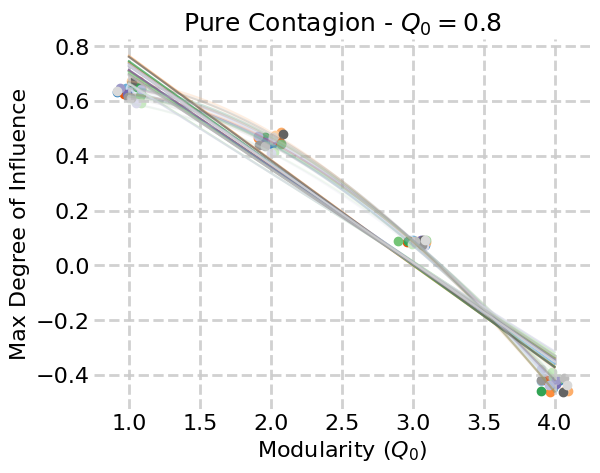

[3.0197819943480018,
 3.01886586189085,
 3.0220974796620554,
 3.038983689358318,
 3.0334084502214957,
 3.0032664792117165,
 3.0186183540731437,
 3.015839227870695,
 3.0062479651061107,
 3.0345177781805526,
 3.0473145705414058,
 3.029560404055183,
 3.020761970547104,
 3.03778386186509,
 3.032688471891401,
 3.0369215727870578,
 3.0169662977880525,
 3.0135956456993784,
 3.035643575972851,
 3.02868903753355]

In [307]:
def get_root(data):
    cmap = plt.get_cmap("tab20c")
    tmp = np.array(list(data.values()))
    roots = []
    fig, ax = plt.subplots(1,1)
    for file in range(len(tmp[0])):
        X, Y = np.array(list(range(1,5))), tmp[:,file]
        # Y[Y<0.05] = 0
        # undershoots = np.where(Y <= 0)[0]
        # print(undershoots)
        # Y = np.round(Y, 1)
        # Y[Y==0.] = 0.

        # if Y[0] <= 0:
        #     roots.append(0)
        #     continue

        # z, res, _, _, _ = np.polyfit(X[:undershoots[0]+1], Y[:undershoots[0]+1], 1, full=True)
        z, res, _, _, _ = np.polyfit(X, Y, 1, full=True)
        p = np.poly1d(z)

        z3, res3, _, _, _ = np.polyfit(X, Y, 3, full=True)
        p3 = np.poly1d(z3)
        
        roots.append(fsolve(p, [np.min(X), np.max(X)])[0])

        # print(roots[-1], Y) #,X[:undershoots[0]], Y[:undershoots[0]])
        x = np.linspace(np.min(X), np.max(X), 100)
        ax.plot(x, [p(t) for t in x], color=cmap(file), alpha=0.7)
        ax.plot(x, [p3(t) for t in x], color=cmap(file), alpha=0.2)
        ax.scatter(X+np.random.uniform(-0.1, 0.1, X.shape), Y, color=cmap(file), alpha=1)
        gf.set_frame(ax=ax)
        set_labels_and_titles(
            ax=ax,
            title=rf"{point_dict[point]} - $Q_0={mod}$",
            xlabel=r"Modularity ($Q_0$)",
            ylabel=r"Max Degree of Influence",
            tick_size=16,
            label_size=16,
            title_size=18,
        )
    plt.show()
    return roots
point = "[0.0, 0.0, 1.0]"
mod = 0.8
get_root(dos_data[10_000][point][mod])

In [187]:
print(test_plot['[0.0, 1.0, 0.0]'])

{-0.8: [[2.401260504201681, 1.9692803268384664, 2.156542838018742, 2.290626255668446, 1.9214501510574022, 1.8226872246696035, -0.16628766344514123, 2.1208979978675515, 2.212080015536998, 2.0099883697065066, 2.252629848783695, 2.1487257512362112, 2.3918286980064, 1.7394632105316876, 1.6720140002916728, 2.042523304814201, 0.09690873405299345, 1.883425245098039, 2.1748917255527704, 2.021785334750266]], -0.6: [[1.9504525964745123, 4.829445033580771, 1.762766789585429, 9.397993311036792, 2.157927814688454, 17.583612040133783, 8.93502824858757, 5.312967954477391, -4.163265306122472, 5.684137931034482, 1.258325404376784, 4.254129275588504, 6.168284789644014, 1.302543871582099, -12.411994784876159, 6.072854291417169, -12.268683274021358, 1.8140818524501883, -4.826904055390706, -1.8819403857393346]], -0.4: [[3.3771002758571282, 3.399507609668757, 3.4334244610765037, 3.3434336478203988, 3.3939173633830126, 3.428502024291498, 3.2879566107539255, 3.4083625438157243, 3.36333231985406, 3.37361358345

[1.0, 0.0, 0.0] {-0.8: [[1.2540362926549435, 1.2527364508208236, 1.2552038313829263, 1.2586749758043005, 1.252943702411431, 1.250317359993624, 1.2521847229928575, 1.25864241304237, 1.2556929578075933, 1.249568469433588, 1.253935837385268, 1.2585720049648705, 1.2563232725473295, 1.2531618468721195, 1.254234680698164, 1.251289402682388, 1.2529593922409417, 1.2548801581324427, 1.2534249105741289, 1.2544685403815596]], -0.6: [[1.331116756669242, 1.3306508110556323, 1.328528181139115, 1.3270933891895484, 1.3387606682966877, 1.3331961063711302, 1.3305949247085609, 1.3367218897551876, 1.3345321384019255, 1.3330461608706645, 1.3329880738791766, 1.3302816953815204, 1.3306695130213455, 1.3298259804840302, 1.330573275000681, 1.337987137583442, 1.338360235212577, 1.3361354664883942, 1.3375515660075548, 1.3435614087776988]], -0.4: [[1.4259640306667056, 1.4409972881200044, 1.4522613892735932, 1.4363417685965425, 1.4311387432109908, 1.4324182823791989, 1.4304416149417338, 1.446773502541596, 1.4375050

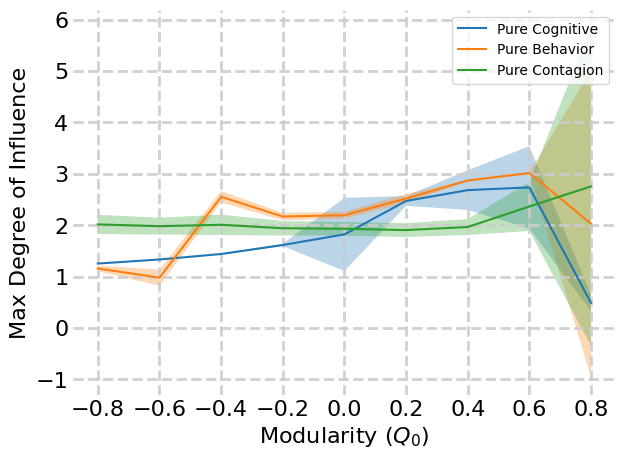

In [309]:
fig, ax = plt.subplots(1,1,figsize=(7,5))
for point in test_plot:
    x = list(test_plot[point].keys())
    x.sort()
    means = np.array([np.mean(test_plot[point][m]) for m in test_plot[point]])
    print(point, test_plot[point])
    stds = np.array([np.std(test_plot[point][m]) for m in test_plot[point]])
    ax.plot(x, means, label=point_dict[point])
    ax.fill_between(x, means-stds, means+stds, alpha=0.3)
gf.set_frame(ax=ax)
set_labels_and_titles(
    ax=ax,
    title=f"",
    xlabel=r"Modularity ($Q_0$)",
    ylabel=r"Max Degree of Influence",
    tick_size=16,
    label_size=16,
    title_size=18,
)
plt.legend()
plt.show()

In [197]:
test_plot["[0.0, 1.0, 0.0]"][-0.6]

[[0,
  4.829445033580771,
  0,
  9.397993311036792,
  0,
  0,
  8.93502824858757,
  5.312967954477391,
  0,
  5.684137931034482,
  0,
  4.254129275588504,
  6.168284789644014,
  0,
  -12.411994784876159,
  6.072854291417169,
  0,
  0,
  0,
  0]]

In [346]:
with open("DOS_p_data_v2_full.json", "w") as outfile:
    json.dump(dos_data, outfile)

In [98]:
dos_data[10000]['[1.0, 0.0, 0.0]'][-0.8]

{1: [-0.8048,
  -0.8048,
  -0.8048,
  -0.8048,
  -0.80219,
  -0.8048,
  -0.8048,
  -0.8048,
  -0.8048,
  -0.8048,
  -0.80182,
  -0.8048,
  -0.8048,
  -0.80331,
  -0.80145,
  -0.8048,
  -0.80445,
  -0.8048,
  -0.8048,
  -0.8048],
 2: [0.6015,
  0.60549,
  0.59999,
  0.58858,
  0.60305,
  0.61334,
  0.60789,
  0.59233,
  0.59735,
  0.61559,
  0.60253,
  0.59004,
  0.59617,
  0.60242,
  0.60061,
  0.61112,
  0.60305,
  0.60028,
  0.60717,
  0.59977],
 3: [-0.32615,
  -0.33058,
  -0.32396,
  -0.31803,
  -0.32889,
  -0.33567,
  -0.33058,
  -0.3139,
  -0.32342,
  -0.33578,
  -0.3217,
  -0.31653,
  -0.31942,
  -0.32935,
  -0.32685,
  -0.33125,
  -0.33138,
  -0.32584,
  -0.32658,
  -0.32862],
 4: [0.51796,
  0.51077,
  0.49355,
  0.49744,
  0.50807,
  0.50919,
  0.50898,
  0.47674,
  0.50387,
  0.51802,
  0.4998,
  0.49274,
  0.50831,
  0.51532,
  0.47954,
  0.51048,
  0.52017,
  0.49569,
  0.48044,
  0.50633]}

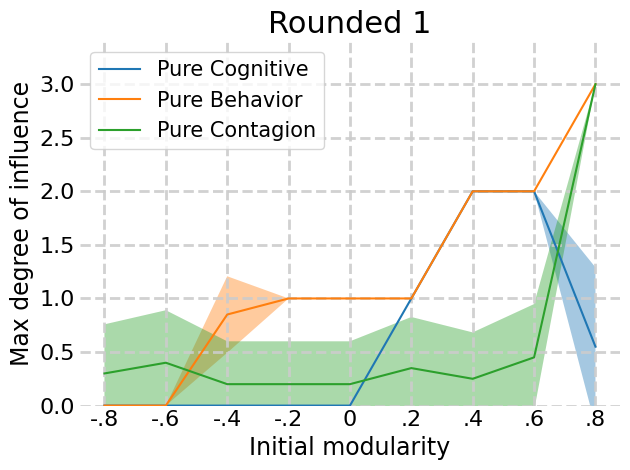

In [112]:
r = 1
plot_data = {}
for sdur in [10000]:
    plot_data.setdefault(sdur, {})
    for point in dos_data[sdur]:
        plot_data[sdur].setdefault(point, {})
        plot_data[sdur][point].setdefault("mean", [])
        plot_data[sdur][point].setdefault("std", [])
        for a in dos_data[sdur][point]:
            df = pd.DataFrame(dos_data[sdur][point][a]).T
            df = df.round(r)
            mDOIs = [df[df[col] <= 0].index[0] for col in df]
            plot_data[sdur][point]["mean"].append(np.mean(mDOIs)-1)
            plot_data[sdur][point]["std"].append(np.std(mDOIs))

for sdur in plot_data:
    fig, ax = plt.subplots(1,1)
    for point in plot_data[sdur]:
        means = np.array(plot_data[sdur][point]["mean"])
        stds = np.array(plot_data[sdur][point]["std"]).flatten()
        ax.plot(conf["a_s"], means, label=point_dict[point])
        ax.fill_between(conf["a_s"], means-stds, means+stds, zorder=-10, alpha=0.4)
    ax.set_ylim(0,3.4)
    ax.xaxis.set_major_formatter(major_formatter)
    # ax.yaxis.set_major_formatter(major_formatter)
    gf.set_frame(ax)
    # if idx > 0:
    set_labels_and_titles(ax, f"Rounded {r}", r"Initial modularity", "Max degree of influence", label_size=17, tick_size=16)

    plt.legend(prop={'size': 15})
    plt.tight_layout()
    plt.savefig(f"dos_degrees_{sdur}_pc_v2_round_{r}.png", dpi=300)

/usr/local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


ValueError: operands could not be broadcast together with shapes (9,) (0,) 

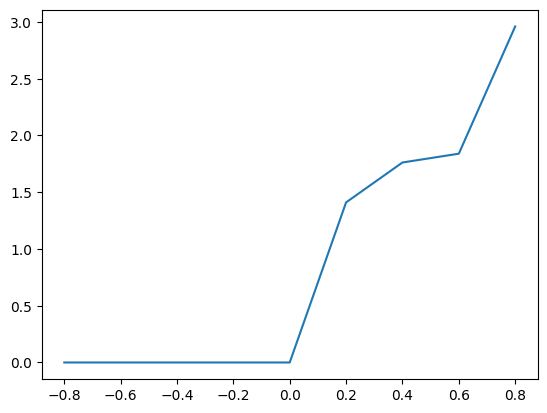

In [116]:
pf = 4
plot_data = {}
for sdur in [10000]:
    plot_data.setdefault(sdur, {})
    for point in dos_data[sdur]:
        plot_data[sdur].setdefault(point, {})
        plot_data[sdur][point].setdefault("mean", [])
        plot_data[sdur][point].setdefault("std", [])
        for a in dos_data[sdur][point]:
            df = pd.DataFrame(dos_data[sdur][point][a]).T
            points = []
            for idx, row in enumerate(df.iterrows()):
                for cor in row[1].values:
                    points.append([idx, cor])
            points = np.array(points)

            X = points[:,0]
            Y = points[:,1]

            z, res, _, _, _ = np.polyfit(X, Y, pf, full=True)
            p = np.poly1d(z)
            x = np.linspace(np.min(X), np.max(X), 100)
            roots = fsolve(p, [np.min(X), np.max(X)])
            rroots = [root for root in roots if np.min(X) < root < np.max(X)]
            if Y[0]<= 0:
                plot_data[sdur][point]["mean"].append(0)
            else:
                plot_data[sdur][point]["mean"].append(rroots[0])
            plot_data[sdur][point]["std"].append(res)

for sdur in plot_data:
    fig, ax = plt.subplots(1,1)
    for point in plot_data[sdur]:
        means = np.array(plot_data[sdur][point]["mean"])
        stds = np.array(plot_data[sdur][point]["std"]).flatten()
        ax.plot(conf["a_s"], means, label=point_dict[point])
        ax.fill_between(conf["a_s"], means-stds, means+stds, zorder=-10, alpha=0.4)
    ax.set_ylim(0,3.4)
    ax.xaxis.set_major_formatter(major_formatter)
    # ax.yaxis.set_major_formatter(major_formatter)
    gf.set_frame(ax)
    # if idx > 0:
    set_labels_and_titles(ax, f"Polyfit {pf}", r"Initial modularity", "Max degree of influence", label_size=17, tick_size=16)

    plt.legend(prop={'size': 15})
    plt.tight_layout()
    plt.savefig(f"dos_degrees_{sdur}_pc_v2_pf{pf}.png", dpi=300)

2.1877812310916873


NameError: name 'mDOIs' is not defined

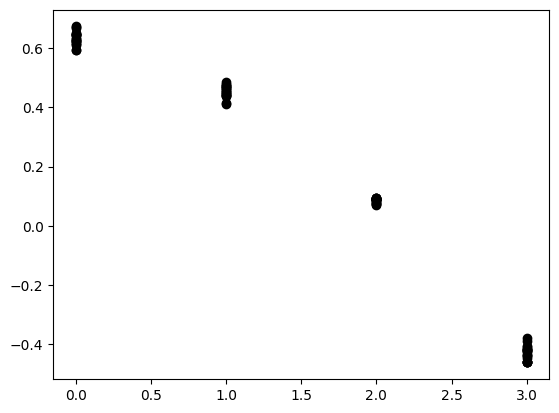

In [79]:
# from sklearn import linear_model
points = []
for idx, row in enumerate(df.iterrows()):
    for cor in row[1].values:
        points.append([idx, cor])
points = np.array(points)

X = points[:,0]
Y = points[:,1]

plt.scatter(X, Y,  color='black')

from scipy.optimize import fsolve
z = np.polyfit(X, Y, 3)
p = np.poly1d(z)
x = np.linspace(np.min(X), np.max(X), 100)
roots = fsolve(p, [np.min(X), np.max(X)])
rroots = [root for root in roots if np.min(X) < root < np.max(X)]
print(rroots[0])
plot_data[sdur][point]["mean"].append(np.mean(mDOIs)-1)

In [202]:
from scipy.optimize import fsolve
f = lambda x: c + m * x
fsolve(f, [np.min(X), np.max(X)])

array([2.02416813, 2.02416813])

In [97]:
plot_data[10000]['[1.0, 0.0, 0.0]']

{'mean': [0,
  0,
  0,
  0,
  0,
  2.306092504696375,
  2.2660962126924966,
  2.257457057483851,
  2.57823745491415],
 'std': [array([18.41021357]),
  array([6.61829225]),
  array([2.11125569]),
  array([0.40361414]),
  array([0.00186804]),
  array([0.0768214]),
  array([0.10398281]),
  array([0.05278561]),
  array([0.02308853])]}

In [77]:
def my_formatter(x, pos):
    """Format 1 as 1, 0 as 0, and all values whose absolute values is between
    0 and 1 without the leading "0." (e.g., 0.7 is formatted as .7 and -0.4 is
    formatted as -.4)."""
    val_str = '{:g}'.format(x)
    if np.abs(x) > 0 and np.abs(x) < 1:
        return val_str.replace("0", "", 1)
    else:
        return val_str
    
from matplotlib.ticker import FuncFormatter
major_formatter = FuncFormatter(my_formatter)

In [65]:
plot_data[10000]['[1.0, 0.0, 0.0]']

{'mean': [0,
  0,
  0,
  0,
  0,
  2.313106518573856,
  2.259873685239252,
  2.276794967415017,
  2.575006605019813],
 'std': [array([5.51481804]),
  array([1.98741085]),
  array([0.63262981]),
  array([0.12289888]),
  array([0.00062611]),
  array([0.02185136]),
  array([0.02550391]),
  array([0.01297812]),
  array([0.00650802])]}

<AxesSubplot: >

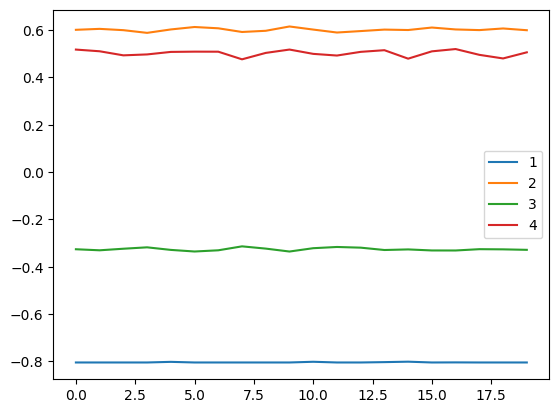

In [100]:
pd.DataFrame(dos_data[10000]['[1.0, 0.0, 0.0]'][-0.8]).plot()

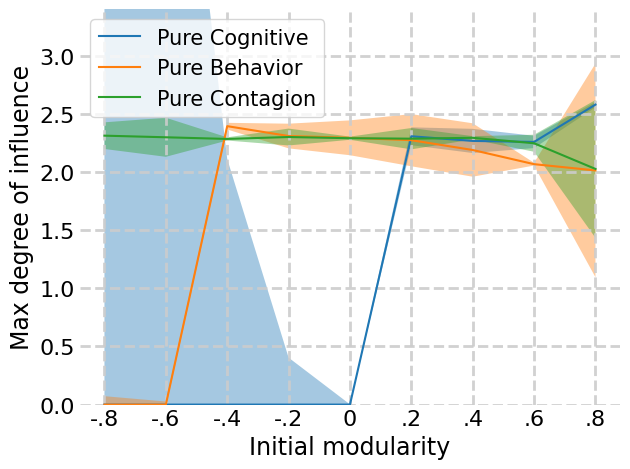

In [96]:
for sdur in plot_data:
    fig, ax = plt.subplots(1,1)
    for point in plot_data[sdur]:
        means = np.array(plot_data[sdur][point]["mean"])
        stds = np.array(plot_data[sdur][point]["std"]).flatten()
        ax.plot(conf["a_s"], means, label=point_dict[point])
        ax.fill_between(conf["a_s"], means-stds, means+stds, zorder=-10, alpha=0.4)
    ax.set_ylim(0,3.4)
    ax.xaxis.set_major_formatter(major_formatter)
    # ax.yaxis.set_major_formatter(major_formatter)
    gf.set_frame(ax)
    # if idx > 0:
    set_labels_and_titles(ax, f"", r"Initial modularity", "Max degree of influence", label_size=17, tick_size=16)

    plt.legend(prop={'size': 15})
    plt.tight_layout()
    plt.savefig(f"dos_degrees_{sdur}_pc_v2.png", dpi=300)

In [71]:
dos_data[10000]['[0, 0, 1]'][-0.6]

{1: [0.1225,
  0.07935,
  0.11103,
  0.11323,
  0.09108,
  0.09254,
  0.08424,
  0.10252,
  0.1028,
  0.11609,
  0.10548,
  0.1061,
  0.10747,
  0.10132,
  0.10983,
  0.15755,
  0.08906,
  0.11019,
  0.17264,
  0.11119],
 2: [0.00369,
  -0.01575,
  -0.00243,
  -0.00481,
  -0.01044,
  -0.00624,
  -0.00747,
  -0.00159,
  -0.00856,
  0.00088,
  -0.00534,
  -0.00459,
  -0.00805,
  -0.00677,
  -0.00682,
  0.00148,
  -0.01061,
  -0.00638,
  0.00801,
  -0.00438],
 3: [-0.00936,
  -0.0036,
  -0.01328,
  -0.00949,
  -0.00535,
  -0.0074,
  -0.00471,
  -0.0075,
  -0.00953,
  -0.01009,
  -0.00832,
  -0.00993,
  -0.01038,
  -0.00981,
  -0.00871,
  -0.00635,
  -0.00463,
  -0.00927,
  -0.00417,
  -0.00964],
 4: [0.00495,
  0.03625,
  0.04266,
  0.03311,
  0.02954,
  0.02974,
  0.02366,
  0.01047,
  0.04123,
  0.01864,
  0.02743,
  0.0331,
  0.04124,
  0.04172,
  0.03516,
  0.0068,
  0.02773,
  0.03442,
  -0.0065,
  0.03721]}

In [ ]:
def dos_p(dos_n, energies, dos_depth=6, states=[0, 1]):
    """Calculates per node their propensity to align with others at a certain
    degree of separation.

    Args:
        dos_n (pd.DataFram): Keeps a record of all the nodes neighbors at
        all distances.
        energies (dict): A dictionary with all nodes as keys, and their group (0, or 1) as values.
        states (list, optional): States in which the nodes can be. Defaults to [0, 1].

    Returns:
        pd.DataFrame: Dataframe with all nodes and their respective propensities at different
        distances.
    """
    df = {"ego": [], "dos": [], "ego_e": [], "n_neighbors": []}
    for node in dos_n:
        for degree in dos_n[node]:
            df["ego"].append(node)
            df["dos"].append(degree)
            # all nodes under threshold energy == 0, otherwise 1.
            # Threshold defaults to .4
            df["ego_e"].append(energies[node])
            energies_neighbors = [energies[n] for n in dos_n[node][degree]]
            df["n_neighbors"].append(len(energies_neighbors))
            for k in states:
                # Count how many neighbors conform to own state, and those who don't.
                count = Counter(energies_neighbors)
                df.setdefault(f"alter_e{k}", [])
                df[f"alter_e{k}"].append(count.get(k, 0))
    # Calculate how many people have minimal energy
    counts = Counter(energies.values())
    n_min_energy = min(list(counts.keys()))
    # Calculate population ratio of minimal energy individuals
    expected_fraction_lonely = counts[n_min_energy] / len(energies)
    # Setup resulting dataframe with the dos_metric
    df = pd.DataFrame(df)
    df["alter_fraction_e0"] = df["alter_e0"] / df["n_neighbors"]
    df["difference_random"] = (df["alter_fraction_e0"] / expected_fraction_lonely) - 1
    df["dos_metric"] = df["difference_random"].div(
        df.groupby(["ego"])["difference_random"].transform("first").abs()
    )

    df.replace([np.inf, -np.inf], 0, inplace=True)
    grouped = (
        df[(df["ego_e"] < 0.5) & (df["dos"] < dos_depth+1)]
        .groupby("dos")
        .mean(numeric_only=True)
        .reset_index()
    )
    try:
        dos_metric = (
            grouped["difference_random"]
            .div(float(grouped[grouped["dos"] == 1]["difference_random"].abs()))
            .to_list()
        )
        if len(dos_metric) == []:
            print("gaat mis in try",grouped)
    except TypeError:
        dos_metric = [0] * dos_depth
        if len(dos_metric) == []:
            print("gaat mis in except",dos_metric, dos_depth)
    return df, dos_metric

conf["base_path"] = "modularity_check_graphs"
conf["a_s"] = [0.0, 0.2, 0.4, 0.6]
dos_data = {}
for sim_dur in [100, 1000, 10000]:
    conf["sim_dur"] = sim_dur
    dos_data.setdefault(sim_dur, {})
    points = [[1,0,0],[0,1,0],[0,0,1]]
    # fig, ax = plt.subplots(1,1,figsize=(6,4))
    for point in points:
        a_data = {}
        full_data = {}
        for a in conf["a_s"]:
            model_path = f"p{'-'.join(str(np.round(p,2)) for p in point)}_b{conf['beta']}_sd{conf['sim_dur']}"
            t0_assort_dir_path = os.path.join(
                conf["base_path"], conf["tt_path"], conf_path, str(a), model_path
            )
            files = os.listdir(t0_assort_dir_path)

            data = []

            for file in files:
                G = nx.read_gml(os.path.join(t0_assort_dir_path, file))
                _, df = dos_df(dos_neighbors(G, depth=6), check_lonely(G))
                data.append(df)
            # print(data)
            a_data[a] = np.nanmean(np.array(data), axis=0)
            full_data[a] = np.array(data)

        doss = {a: [np.argmax(s<0) for s in full_data[a]] for a in full_data}
        means = []
        stds = []
        mins = []
        maxs = []
        for a in conf["a_s"]:
            means.append(np.mean(doss[a]))
            stds.append(np.std(doss[a]))
            mins.append(np.min(doss[a]))
            maxs.append(np.max(doss[a]))
        means = np.array(means)
        stds = np.array(stds)
        mins = np.array(mins)
        maxs = np.array(maxs)

        point = str(point)
        dos_data[sim_dur].setdefault(point, {})
        dos_data[sim_dur][point]["means"] = means
        dos_data[sim_dur][point]["stds"] = stds
        dos_data[sim_dur][point]["mins"] = mins
        dos_data[sim_dur][point]["maxs"] = maxs


0.77135


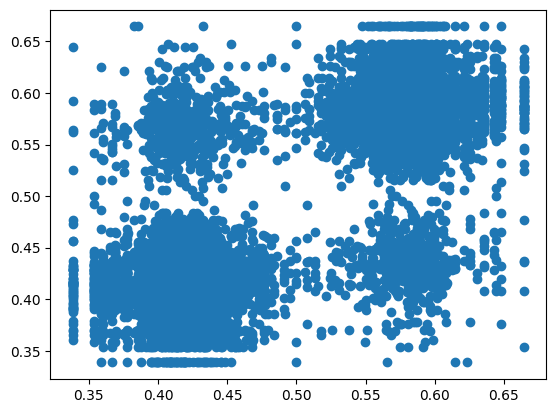

0.55962


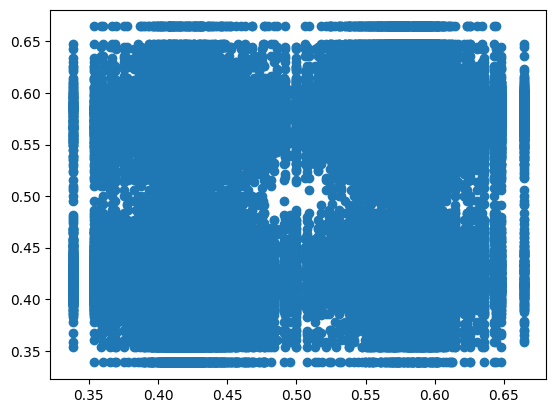

0.0846


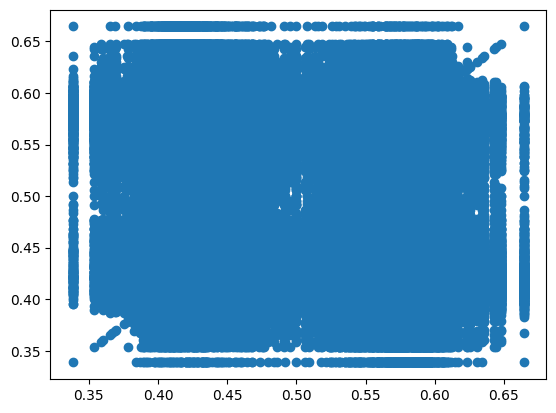

-0.56127


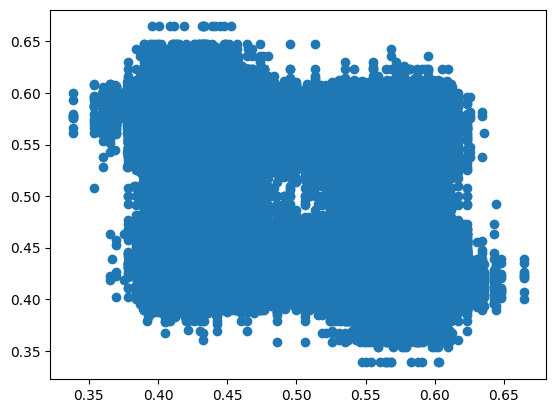

In [68]:
links = {distance:[] for distance in range(1,5)}
for node in dn:
    for distance in dn[node]:
        for neighbor in dn[node][distance]:
            links[distance].append([G.nodes[node]["e"],G.nodes[neighbor]["e"]])

for d in links:
    energy_links = np.array(links[d])

    if np.all(energy_links[:, 0] == energy_links[:, 0][0]) and np.all(
        energy_links[:, 1] == energy_links[:, 1][0]
    ):
        corrcoef = [[1, 1], [1, 1]]
    else:
        import warnings

        with warnings.catch_warnings():
            warnings.filterwarnings("error")
            try:
                corrcoef = np.corrcoef(energy_links[:, 0], energy_links[:, 1])
            except Warning as e:
                print("error found:", e)
                print(energy_links)
                corrcoef = [[np.nan, np.nan], [np.nan, np.nan]]
                raise Exception("Energy links were off, check this!")

    print(list(map(lambda x: list(np.around(x,5,)),corrcoef,))[0][1])

    plt.scatter(energy_links[:,0], energy_links[:,1])
    plt.show()


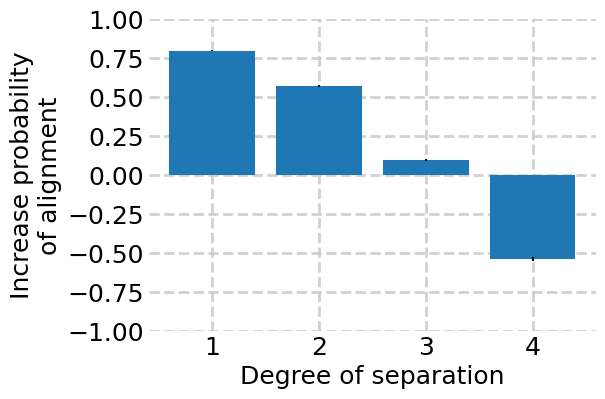

In [24]:
means = [np.mean(ps[d]) for d in ps]
stds = [np.std(ps[d]) for d in ps]
fig, ax = plt.subplots(1,1, figsize=(6,4))
plt.bar(list(range(1,5)), means, yerr=stds, zorder=100)
gf.set_frame(ax)
plt.xticks([1,2,3,4])
set_labels_and_titles(ax, "", r"Degree of separation", "Increase probability\nof alignment", tick_size=18, label_size=18)
plt.tight_layout()
ax.set_ylim(-1, 1)
plt.savefig("./results/dos_example.png", dpi=300)

# Modularity check

In [161]:
from itertools import groupby

def modularity_check(
    e_groups,
    n_per_group,
    p_rel,
    network_gen_fn=barabasi_albert
):
    G, component_links = fully_assortative_network(
        e_groups, n_per_group, p_rel, network_gen_fn
    )

    # Generate default network
    avg_degree = calc_avg_degree(G)
    communities = [set(g) for k, g in groupby(list(G.nodes), lambda s: s[0])]

    ps = [np.round(pearson(G), 2)]
    ms = [nx.community.modularity(G, communities)]
    lc = nx.community.louvain_communities(G)
    lms = [nx.community.modularity(G, lc)]
    ls = [[len(c) for c in lc]]


    rand_component_links = component_links.sample(frac=1)
    for _, row in rand_component_links.iterrows():
        G.remove_edges_from([row[e_groups[0]], row[e_groups[1]]])
        G.add_edge(row[e_groups[0]][0], row[e_groups[1]][1])
        G.add_edge(row[e_groups[1]][0], row[e_groups[0]][1])

        # Calculate pearson and store graph if needed
        lc = nx.community.louvain_communities(G)
        ps.append(np.round(pearson(G), 2))
        ms.append(np.round(nx.community.modularity(G, communities), 2))
        lms.append(np.round(nx.community.modularity(G, lc), 2))
        ls.append([len(c) for c in lc])

        if np.round(pearson(G), 2) == 0.6:
            return ps, ms, lms, ls, G
    return ps, ms, lms, ls, G
ps, ms, lms, ls, G = modularity_check(
    [0.2,0.8],
    500,
    11
)

KeyboardInterrupt: 

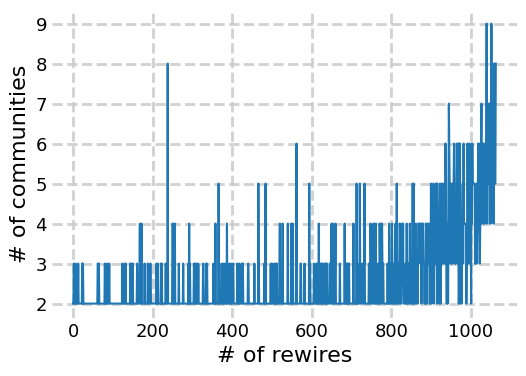

In [118]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.plot([len(s) for s in ls])
set_labels_and_titles(
    ax=ax,
    title=f"",
    xlabel=r"# of rewires",
    ylabel=r"# of communities",
    tick_size=13,
    label_size=16,
    title_size=18,
)
gf.set_frame(ax)

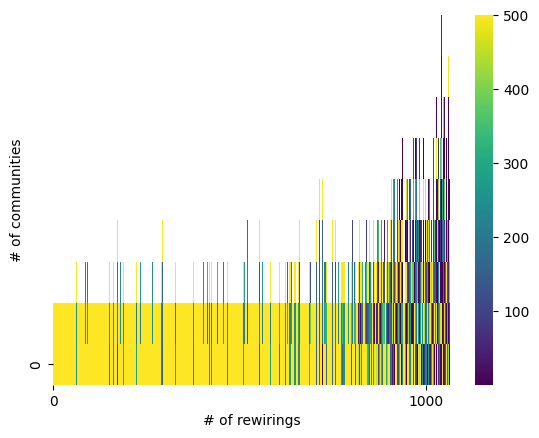

In [119]:
max_communities = max([len(s) for s in ls])
df_data = {}
for xid, s in enumerate(ls):
    df_data.setdefault(xid, {})
    for yid in range(max_communities):
        try:
            df_data[xid][yid] = s[yid]
        except IndexError:
            df_data[xid][yid] = 0
df = pd.DataFrame(df_data)

import matplotlib
cmap = matplotlib.cm.viridis
cmap.set_under('w')

ax = sns.heatmap(df, xticklabels=1000, yticklabels=10, cmap=cmap, vmin=0.0001)
ax.set(xlabel="# of rewirings", ylabel="# of communities")
ax.invert_yaxis()

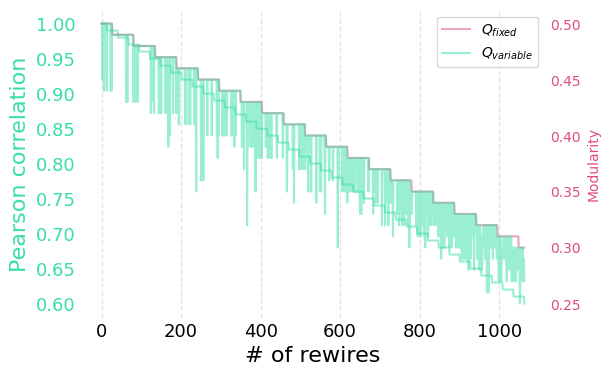

In [120]:
fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.plot(ps, label=r"$\rho$", color="#37DEA9", alpha=.5)
set_labels_and_titles(
    ax=ax,
    title=f"",
    xlabel=r"# of rewires",
    ylabel=r"",
    tick_size=13,
    label_size=16,
    title_size=18,
)

ax2 = ax.twinx()
ax2.plot(ms, label=r"$Q_{fixed}$", color="#DE4E78", alpha=.5)
ax2.plot(lms, label=r"$Q_{variable}$", color="#37DEA9", alpha=.5)

ax.set_ylabel('Pearson correlation', color="#37DEA9")
ax.tick_params(axis='y', labelcolor="#37DEA9")

ax2.set_ylabel('Modularity', color="#DE4E78")
ax2.tick_params(axis='y', labelcolor="#DE4E78")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax.yaxis.set_tick_params(which="both", length=0)
ax.xaxis.set_tick_params(which="both", length=0)
ax2.yaxis.set_tick_params(which="both", length=0)
ax2.xaxis.set_tick_params(which="both", length=0)

ax.xaxis.grid(True, color="#CCCCCC", linestyle="--", lw=1, alpha=0.5)
# ax.yaxis.grid(True, color="#37DEA9", linestyle="--", lw=1, alpha=0.2)
# ax2.yaxis.grid(True, color="#DE4E78", linestyle="--", lw=1, alpha=0.2)
plt.legend()
plt.show()


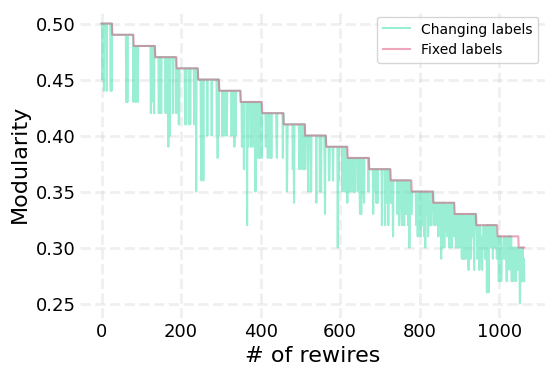

In [121]:
fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.plot(lms, label=r"Changing labels", color="#37DEA9", alpha=.5)
ax.plot(ms, label=r"Fixed labels", color="#DE4E78", alpha=.5)
set_labels_and_titles(
    ax=ax,
    title=f"",
    xlabel=r"# of rewires",
    ylabel=r"Modularity",
    tick_size=13,
    label_size=16,
    title_size=18,
)
gf.set_frame(ax, major_alpha=0.3)
plt.legend()
plt.show()


# Fixed modularity, differing trait correlations

### Explore reachable assortativity space for fixed network

In [125]:
lc = nx.community.louvain_communities(G)
p = np.round(pearson(G), 2)
mfc = np.round(nx.community.modularity(G, communities), 2)
mlc = np.round(nx.community.modularity(G, lc), 2)
print(p, mfc, mlc)

0.6 0.3 0.3


#### Swap attributes

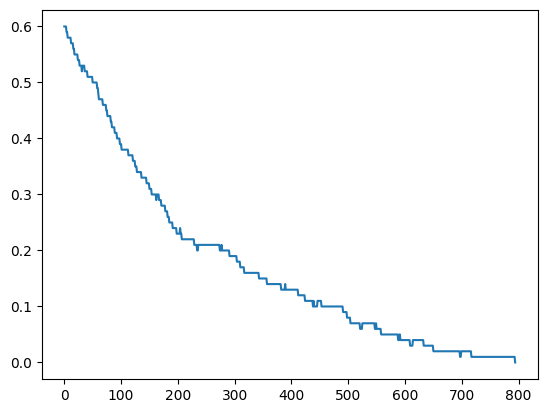

In [164]:
ps, sGs = random_single_swap(G, 2000)
plt.plot(ps)

In [176]:
sGs

In [180]:
from itertools import groupby


def gen_network(e_groups, n_per_group, p_rel, network_gen_fn=barabasi_albert):
    G, component_links = fully_assortative_network(
        e_groups, n_per_group, p_rel, network_gen_fn
    )

    # Generate default network
    avg_degree = calc_avg_degree(G)
    communities = [set(g) for k, g in groupby(list(G.nodes), lambda s: s[0])]

    rand_component_links = component_links.sample(frac=1)
    for _, row in rand_component_links.iterrows():
        G.remove_edges_from([row[e_groups[0]], row[e_groups[1]]])
        G.add_edge(row[e_groups[0]][0], row[e_groups[1]][1])
        G.add_edge(row[e_groups[1]][0], row[e_groups[0]][1])

        if (
            np.round(pearson(G), 2) == 0.6
            and np.round(
                nx.community.modularity(G, nx.community.louvain_communities(G)), 1
            )
            == 0.3
        ):
            return G
    return gen_network(e_groups, n_per_group, p_rel)


def random_single_swap(G, n_swaps, samples=[0.6, 0.4, 0.2, 0]):
    G_new = G.copy()
    ps = [np.round(pearson(G_new), 2)]
    sampled_Gs = {}
    for _ in range(n_swaps):
        if ps[-1] in samples:
            sampled_Gs[ps[-1]] = G_new.copy()
            samples.remove(ps[-1])
        if len(samples) == 0:
            return ps, sampled_Gs

        i, j = np.random.choice(G_new.nodes, 2)
        G_new.nodes[i]["e"], G_new.nodes[j]["e"] = (
            G_new.nodes[j]["e"],
            G_new.nodes[i]["e"],
        )
        ps.append(np.round(pearson(G_new), 2))
    print("No samples being sampled?")
    return ps, sampled_Gs


def modularity_check_network_gen(n_networks):
    for idx in range(n_networks):
        G = gen_network([0.2, 0.8], 500, 11)
        assert np.round(pearson(G), 2) == 0.6, "Wrong assort!"
        assert (
            np.round(nx.community.modularity(G, nx.community.louvain_communities(G)), 1)
            == 0.3
        ), "Wrong modularity!"
        print(f"Got a network! {idx=}")
        samples = [0.6, 0.4, 0.2, 0]
        ps, sGs = random_single_swap(G, 2000, samples=samples)
    
        for sG in sGs:
            write_graph(sGs[sG], f"./modularity_check_graphs/{sG}")
            print(f"Wrote graph {sG} number {idx}")
    return "Done!"


modularity_check_network_gen(20)


Got a network! idx=0
Wrote graph {sG} number {idx}
Wrote graph {sG} number {idx}
Wrote graph {sG} number {idx}
Wrote graph {sG} number {idx}
Got a network! idx=1
Wrote graph {sG} number {idx}
Wrote graph {sG} number {idx}
Wrote graph {sG} number {idx}
Wrote graph {sG} number {idx}
Got a network! idx=2
Wrote graph {sG} number {idx}
Wrote graph {sG} number {idx}
Wrote graph {sG} number {idx}
Wrote graph {sG} number {idx}
Got a network! idx=3
Wrote graph {sG} number {idx}
Wrote graph {sG} number {idx}
Wrote graph {sG} number {idx}
Wrote graph {sG} number {idx}
Got a network! idx=4
Wrote graph {sG} number {idx}
Wrote graph {sG} number {idx}
Wrote graph {sG} number {idx}
Wrote graph {sG} number {idx}
Got a network! idx=5
Wrote graph {sG} number {idx}
Wrote graph {sG} number {idx}
Wrote graph {sG} number {idx}
Wrote graph {sG} number {idx}
Got a network! idx=6
Wrote graph {sG} number {idx}
Wrote graph {sG} number {idx}
Wrote graph {sG} number {idx}
Wrote graph {sG} number {idx}
Got a network

'Done!'

In [181]:
mcheck_path = os.path.join(
    "modularity_check_graphs", "0.0"
)
G0 = nx.read_gml(os.path.join(mcheck_path, "0.gml"))
G1 = nx.read_gml(os.path.join(mcheck_path, "1.gml"))

In [ ]:
idx_translate = {0:.6, 1:.4, 2:.2, 3:0}
for run in networkz:


In [158]:
for G_ in sGs:
    lc = nx.community.louvain_communities(G_)
    p = np.round(pearson(G_), 2)
    mfc = np.round(nx.community.modularity(G_, communities), 2)
    mlc = np.round(nx.community.modularity(G_, lc), 2)
    print(p, mfc, mlc)

0.6 0.3 0.28
0.4 0.3 0.29
0.2 0.3 0.3
0.0 0.3 0.27


# Other stuff

## Ergodicity check


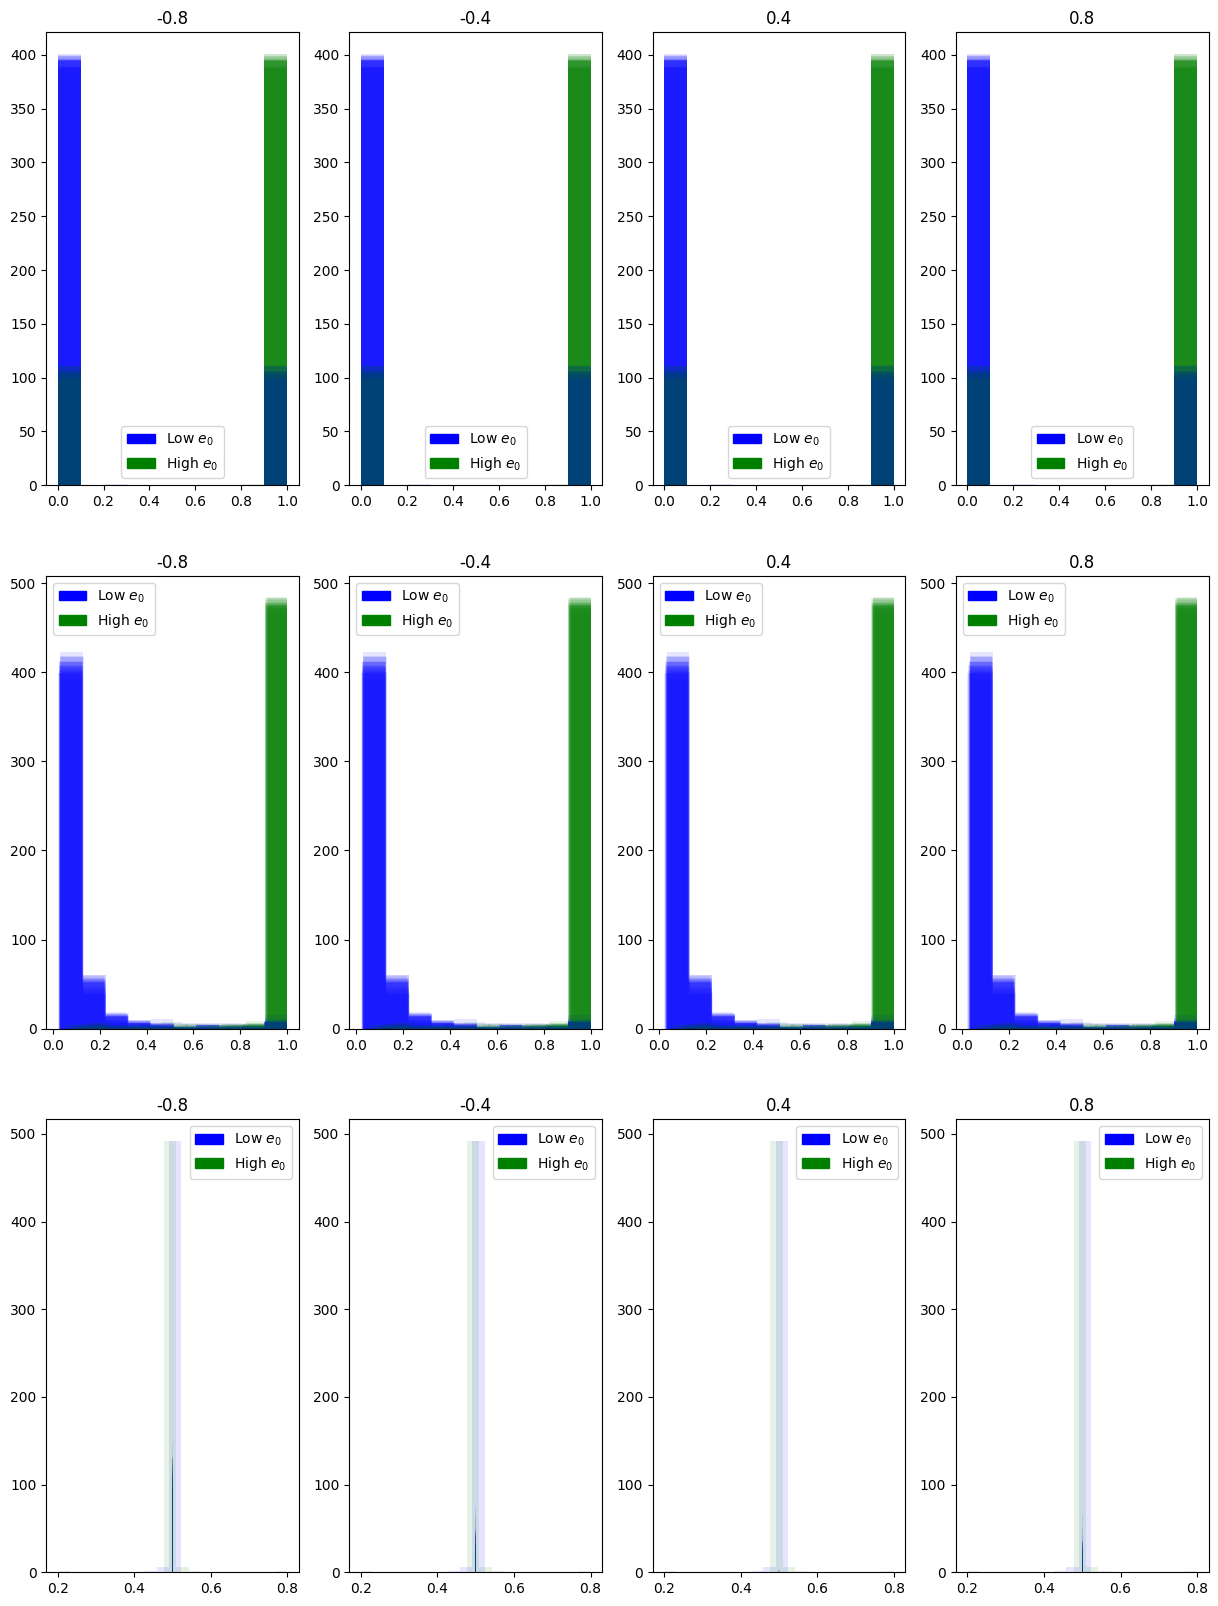

In [108]:
fig, ax = plt.subplots(3,4, figsize=(15,20))
for row, point in enumerate([[1.0,0.0,0.0], [0.0,1.0,0.0], [0.0,0.0,1.0]]):
    model_path = f"p{'-'.join(str(np.round(p,2)) for p in point)}_b{conf['beta']}_sd{10000}"
    for col, a in enumerate([-0.8, -0.4, 0.4, 0.8]):
        tt_assort_dir_path = os.path.join(
            conf["base_path"], conf["tt_path"], conf_path, str(a), model_path
        )
        files = os.listdir(tt_assort_dir_path)

        for file in files:
            G = nx.read_gml(os.path.join(tt_assort_dir_path, file))
            ax[row, col].hist([G.nodes[node]["e"] for node in G.nodes if node[0] == "0"], alpha=0.1, color="blue")
            ax[row, col].hist([G.nodes[node]["e"] for node in G.nodes if node[0] == "1"], alpha=0.1, color="green")
            ax[row, col].set_title(a)
        patches = [mpatches.Patch(color="blue", label=r"Low $e_0$"),
                mpatches.Patch(color="green", label=r"High $e_0$")]
        ax[row, col].legend(handles=patches)
plt.show()

In [124]:
defector_data = {}
for row, point in enumerate([[1.0,0.0,0.0], [0.0,1.0,0.0], [0.0,0.0,1.0]]):
    model_path = f"p{'-'.join(str(np.round(p,2)) for p in point)}_b{conf['beta']}_sd{10000}"
    defector_data.setdefault(str(point), {})
    for col, a in enumerate([-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8]):
        defector_data[str(point)].setdefault(a, {"ones":[], "zeros":[]})
        tt_assort_dir_path = os.path.join(
            conf["base_path"], conf["tt_path"], conf_path, str(a), model_path
        )
        files = os.listdir(tt_assort_dir_path)
        for file in files:
            G = nx.read_gml(os.path.join(tt_assort_dir_path, file))
            zeros = np.array([G.nodes[node]["e"] for node in G.nodes if node[0] == "0"])
            ones = np.array([G.nodes[node]["e"] for node in G.nodes if node[0] == "1"])
            defector_data[str(point)][a]["zeros"].append(len(zeros[zeros>0.5])/len(zeros))
            defector_data[str(point)][a]["ones"].append(len(ones[ones<0.5])/len(ones))

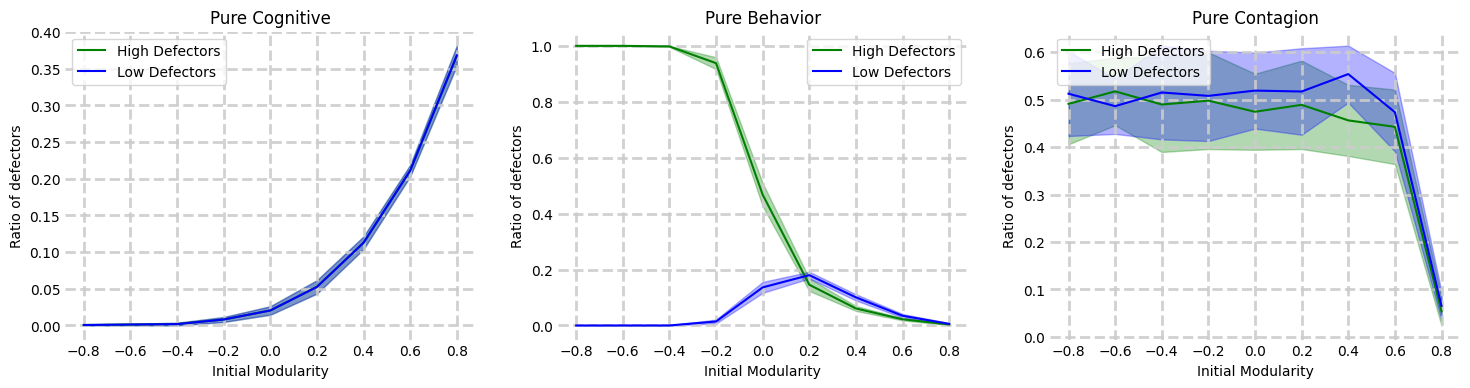

In [139]:
xaxis = [-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8]
fig, ax = plt.subplots(1,3,figsize=(18,4))
for idx, point in enumerate(defector_data):
    ones_mean = np.array([np.mean(defector_data[point][x]["ones"]) for x in xaxis])
    zeros_mean = np.array([np.mean(defector_data[point][x]["zeros"]) for x in xaxis])
    ones_std = np.array([np.std(defector_data[point][x]["ones"]) for x in xaxis])
    zeros_std = np.array([np.std(defector_data[point][x]["zeros"]) for x in xaxis])

    ax[idx].plot(xaxis, ones_mean, label="High Defectors", color="green")
    ax[idx].plot(xaxis, zeros_mean, label="Low Defectors", color="blue")
    ax[idx].fill_between(xaxis, ones_mean-ones_std, ones_mean+ones_std, alpha=0.3, color="green")
    ax[idx].fill_between(xaxis, zeros_mean-zeros_std, zeros_mean+zeros_std, alpha=0.3, color="blue")

    ax[idx].set_title(point_dict[point])
    ax[idx].set_ylabel("Ratio of defectors")
    ax[idx].set_xlabel("Initial Modularity")
    ax[idx].legend()

    gf.set_frame(ax[idx])

In [129]:
defector_data["[0.0, 0.0, 1.0]"][0.8]

{'ones': [0.046,
  0.028,
  0.018,
  0.044,
  0.048,
  0.02,
  0.044,
  0.044,
  0.068,
  0.092,
  0.052,
  0.136,
  0.1,
  0.056,
  0.026,
  0.068,
  0.01,
  0.076,
  0.034,
  0.064],
 'zeros': [0.072,
  0.108,
  0.13,
  0.068,
  0.052,
  0.122,
  0.036,
  0.03,
  0.028,
  0.028,
  0.082,
  0.052,
  0.028,
  0.054,
  0.09,
  0.072,
  0.072,
  0.062,
  0.082,
  0.038]}

# Next

In [60]:
np.argmax(np.mean(dos_d, axis=0)<0)

3

In [67]:
np.argmax(np.array([1,0,-1,0,0])<0)

2

In [102]:
t0_assort_dir_path = os.path.join(
    conf["base_path"], conf["tt_path"], conf_path, str(-.6), model_path
)
G = nx.read_gml(os.path.join(t0_assort_dir_path, "12.gml"))

In [103]:
for file_n in range(20):
    G = nx.read_gml(os.path.join(t0_assort_dir_path, f"{file_n}.gml"))
    _, dos_g = dos_df(dos_neighbors(G, depth=4), check_lonely(G))
    print(dos_g, np.argmax(np.array(dos_g)<0))
    


[0, 0, 0, 0] 0
[0, 0, 0, 0] 0
[0, 0, 0, 0] 0
[0, 0, 0, 0] 0
[0, 0, 0, 0] 0
[0, 0, 0, 0] 0
[0, 0, 0, 0] 0
[1.0, -0.05042016806722689, -0.05042016806722689, 0.012921751615218947] 1
[0, 0, 0, 0] 0
[0, 0, 0, 0] 0
[0, 0, 0, 0] 0
[0, 0, 0, 0] 0
[0, 0, 0, 0] 0
[0, 0, 0, 0] 0
[0, 0, 0, 0] 0
[0, 0, 0, 0] 0
[0, 0, 0, 0] 0
[0, 0, 0, 0] 0
[0, 0, 0, 0] 0
[-1.0, -1.0, -1.0, -1.0] 0


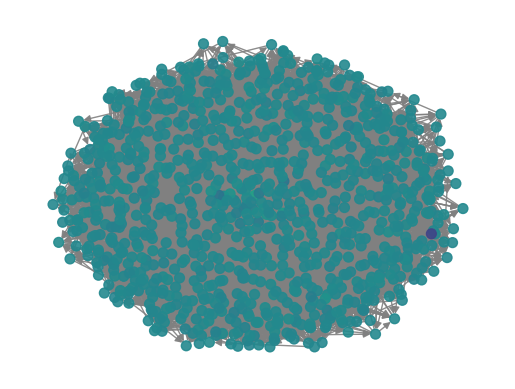

In [71]:
G = nx.read_gml(os.path.join(t0_assort_dir_path, f"0.gml"))
fig, ax = plt.subplots(1,1)
plot_grid(ax, G)

In [73]:
df, dos_g = dos_df(dos_neighbors(G, depth=4), check_lonely(G))
print(dos_g, np.argmax(np.array(dos_g)<0))

[1.0, 1.4844294796270492, -0.6972176922489296, -2.690036900369004] 2


In [89]:
check_lonely(G)


{'0': 1.0,
 '1': 1.0,
 '2': 1.0,
 '3': 1.0,
 '4': 1.0,
 '5': 1.0,
 '6': 1.0,
 '7': 1.0,
 '8': 1.0,
 '9': 1.0,
 '10': 1.0,
 '11': 1.0,
 '12': 0.0,
 '13': 1.0,
 '14': 1.0,
 '15': 1.0,
 '16': 1.0,
 '17': 1.0,
 '18': 1.0,
 '19': 0.0,
 '20': 1.0,
 '21': 1.0,
 '22': 1.0,
 '23': 1.0,
 '24': 1.0,
 '25': 1.0,
 '26': 1.0,
 '27': 1.0,
 '29': 1.0,
 '30': 1.0,
 '31': 1.0,
 '32': 1.0,
 '35': 1.0,
 '36': 1.0,
 '38': 1.0,
 '39': 1.0,
 '40': 1.0,
 '41': 1.0,
 '42': 1.0,
 '43': 1.0,
 '44': 1.0,
 '45': 1.0,
 '49': 1.0,
 '52': 1.0,
 '53': 1.0,
 '54': 1.0,
 '55': 1.0,
 '58': 1.0,
 '63': 1.0,
 '64': 1.0,
 '68': 1.0,
 '69': 1.0,
 '70': 1.0,
 '75': 1.0,
 '76': 1.0,
 '77': 1.0,
 '78': 1.0,
 '86': 1.0,
 '88': 1.0,
 '91': 1.0,
 '92': 1.0,
 '97': 1.0,
 '100': 1.0,
 '102': 1.0,
 '109': 1.0,
 '112': 1.0,
 '115': 1.0,
 '116': 1.0,
 '117': 1.0,
 '120': 1.0,
 '124': 1.0,
 '126': 1.0,
 '127': 1.0,
 '129': 1.0,
 '130': 1.0,
 '144': 1.0,
 '146': 1.0,
 '149': 1.0,
 '155': 1.0,
 '159': 1.0,
 '160': 1.0,
 '162': 1.0,
 '164'

In [ ]:
t0_assort_dir_path = os.path.join(
    conf["base_path"], conf["tt_path"], conf_path, str(0), model_path
)
G = nx.read_gml(os.path.join(t0_assort_dir_path, file))
model_parameters = {"G": G.copy(), "h": 0.05, "beta": 1 / 2, "point": point}

In [90]:
[e for e in G.edges if "19" in e]

[('0', '19'),
 ('1', '19'),
 ('4', '19'),
 ('11', '19'),
 ('12', '19'),
 ('14', '19'),
 ('15', '19'),
 ('19', '2'),
 ('19', '13'),
 ('19', '16'),
 ('19', '18'),
 ('19', '20'),
 ('19', '22'),
 ('19', '27'),
 ('19', '29'),
 ('19', '32'),
 ('19', '34'),
 ('19', '37'),
 ('19', '39'),
 ('19', '49'),
 ('19', '53'),
 ('19', '55'),
 ('19', '61'),
 ('19', '67'),
 ('19', '74'),
 ('19', '83'),
 ('19', '88'),
 ('19', '96'),
 ('19', '101'),
 ('19', '103'),
 ('19', '116'),
 ('19', '124'),
 ('19', '141'),
 ('19', '154'),
 ('19', '161'),
 ('19', '174'),
 ('19', '179'),
 ('19', '201'),
 ('19', '209'),
 ('19', '218'),
 ('19', '236'),
 ('19', '241'),
 ('19', '253'),
 ('19', '259'),
 ('19', '265'),
 ('19', '294'),
 ('19', '308'),
 ('19', '327'),
 ('19', '337'),
 ('19', '344'),
 ('19', '351'),
 ('19', '360'),
 ('19', '364'),
 ('19', '375'),
 ('19', '397'),
 ('19', '420'),
 ('19', '430'),
 ('19', '443'),
 ('19', '459'),
 ('19', '466'),
 ('19', '476'),
 ('19', '497'),
 ('19', '519'),
 ('19', '548'),
 ('19', 

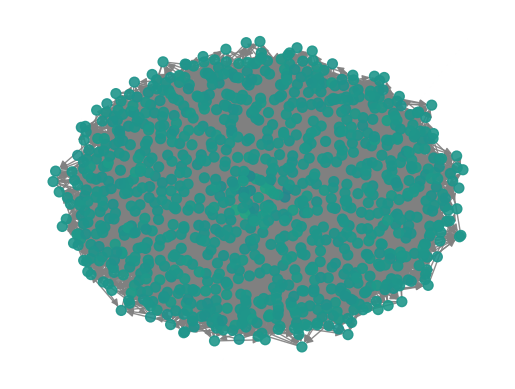

In [61]:
fig, ax = plt.subplots(1,1)
plot_grid(ax, G)

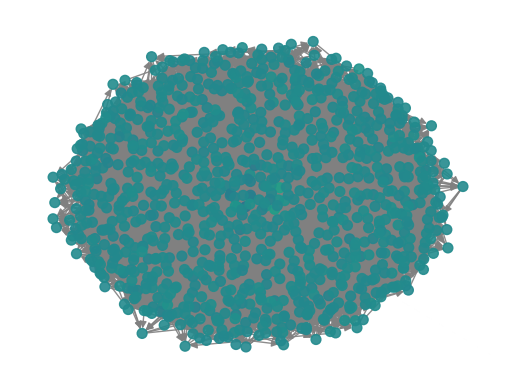

In [59]:
fig, ax = plt.subplots(1,1)
plot_grid(ax, G)

In [55]:
doss

{0.8: [2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 0.6: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 0.4: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 0.2: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 0: [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0],
 -0.2: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 -0.4: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 -0.6: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 -0.8: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]}

Voor assort convergence plot, maak het vierkant en zet er een lichte grijze diagonale lijn in.

rerun everything, generate two equal networks and rewire the same nodes in the edgerewire algorithm. This way we have a fixed way where we do not mess the scale-freeness up. !IMPORTANT!
Also use the same algorithm for the zero graphs. So no shortcut.

In [275]:
model_path = f"p{'-'.join(str(np.round(p,2)) for p in [0,0,1])}_b{conf['beta']}_sd{conf['sim_dur']}"
t0_assort_dir_path = os.path.join(
    conf["base_path"], conf["tt_path"], conf_path, str(0), model_path
)
G0 = nx.read_gml(os.path.join(t0_assort_dir_path, "0.gml"))

In [276]:
model_path = f"p{'-'.join(str(np.round(p,2)) for p in [0,0,1])}_b{conf['beta']}_sd{conf['sim_dur']}"
t0_assort_dir_path = os.path.join(
    conf["base_path"], conf["tt_path"], conf_path, str(0.2), model_path
)
G02 = nx.read_gml(os.path.join(t0_assort_dir_path, "0.gml"))

In [293]:
print(f"{len(G0.nodes)=}, {len(G02.nodes)=}, {len(G0.edges)=}, {len(G02.edges)=}")

len(G0.nodes)=1000, len(G02.nodes)=1000, len(G0.edges)=10879, len(G02.edges)=10758


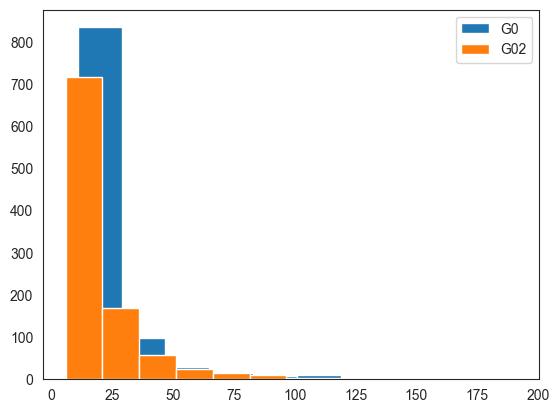

In [291]:
plt.hist(dict(G0.degree).values(), label="G0")
plt.hist(dict(G02.degree).values(), label="G02")

plt.legend()

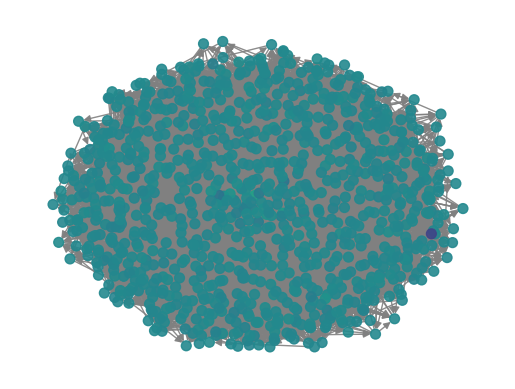

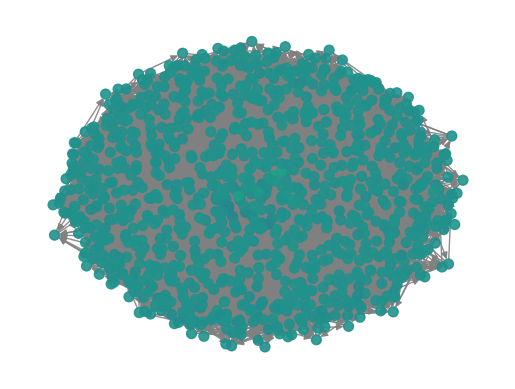

In [294]:
fig, ax = plt.subplots(1,1)
plot_grid(ax, G0)
plt.show()

fig, ax = plt.subplots(1,1)
plot_grid(ax, G02)
plt.show()

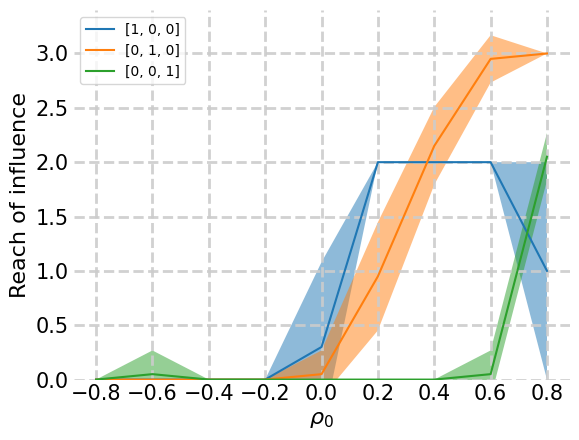

In [93]:
fig, ax = plt.subplots(1,1)
for point in pdata:
    means = pdata[point]["means"]
    stds = pdata[point]["stds"]
    ax.plot(conf["a_s"], means, label=point)
    ax.fill_between(conf["a_s"], means-stds, means+stds, zorder=-10, alpha=0.5)
ax.set_ylim(0,3.4)
plt.legend()
gf.set_frame(ax)
set_labels_and_titles(ax, "", r"$\rho_0$", "Reach of influence", label_size=16, tick_size=15    
)

In [101]:
{a:np.argmax(a_data[a]<0) for a in a_data}
{a: np.nanstd(full_data[a], axis=0) for a in full_data}

{0.8: array([0.        , 0.06880847, 0.02259231, 0.06204509]),
 0.6: array([0.38405729, 0.29933301, 0.368161  , 0.30239614]),
 0.4: array([0., 0., 0., 0.]),
 0.2: array([0.21794495, 0.21794495, 0.21794495, 0.21794495]),
 0: array([0., 0., 0., 0.]),
 -0.2: array([0.21794495, 0.21794495, 0.21794495, 0.21794495]),
 -0.4: array([0., 0., 0., 0.]),
 -0.6: array([0.31622777, 0.21764341, 0.21764341, 0.2181113 ]),
 -0.8: array([0.3, 0.3, 0.3, 0.3])}

In [243]:
conf["a_s"]

[-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8]

In [253]:
doss = {a: [np.argmax(s<0) for s in full_data[a]] for a in full_data}
means = []
stds = []
for a in [-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8]:
    means.append(np.mean(doss[a]))
    stds.append(np.std(doss[a]))
means = np.array(means)
stds = np.array(stds)

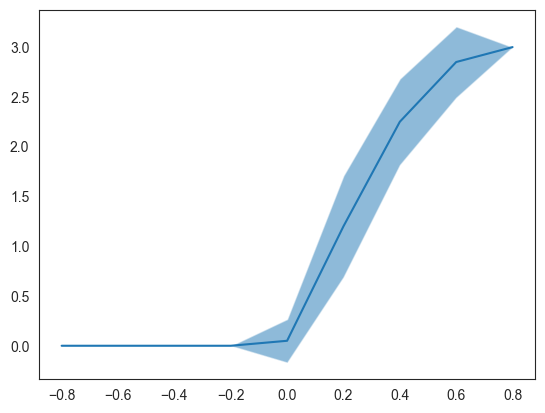

In [258]:
plt.plot(conf["a_s"], means)
plt.fill_between(conf["a_s"], means-stds, means+stds, zorder=-10, alpha=0.5)

In [204]:

display(grouped["difference_random"])


0   -0.108193
1   -0.040141
2    0.007898
3   -0.010215
Name: difference_random, dtype: float64

0   -1.000000
1   -0.371016
2    0.073000
3   -0.094418
Name: difference_random, dtype: float64

In [201]:
float(grouped[grouped["dos"]==1]["difference_random"])

-0.10819258607545604

In [164]:
d1 = [{1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0},{1: 1.5, 2: 1.3, 3: 1.7, 4: 1.2}, {2:4, 4:1, 1:3, 3:2}]
print([[d[dos_d] for dos_d in range(1,5)] for d in d1])




[[1.0, 1.0, 1.0, 1.0], [1.5, 1.3, 1.7, 1.2], [3, 4, 2, 1]]


In [153]:
Counter(check_lonely(G).values())

Counter({1.0: 1000})

In [91]:
df[df["ego"].isin([str(i) for i in range(3)])]


ego  dos  ego_e  n_neighbors  alter_e0  alter_e1  alter_fraction_e0  \
0    0    1    0.0           56        33        23           0.589286   
1    0    2    0.0          481       264       217           0.548857   
2    0    3    0.0          459       205       254           0.446623   
3    0    4    0.0            4         2         2           0.500000   
4    1    1    0.0            8         4         4           0.500000   
5    1    2    0.0          131        60        71           0.458015   
6    1    3    0.0          716       361       355           0.504190   
7    1    4    0.0          145        79        66           0.544828   
8    2    1    0.0           25        15        10           0.600000   
9    2    2    0.0          285       150       135           0.526316   
10   2    3    0.0          651       316       335           0.485407   
11   2    4    0.0           39        23        16           0.589744   

    difference_random  dos_metric  
0            0.169218    1.000000  
1            0.089001    0.525956  
2           -0.113843   -0.672761  
3           -0.007937   -0.046901  
4           -0.007937    1.000000  
5           -0.091240   11.496183  
6            0.000377   -0.047486  
7            0.081007  -10.206897  
8            0.190476    1.000000  
9            0.044277    0.232456  
10          -0.036891   -0.193676  
11           0.170126    0.893162

In [92]:
get_threshold_dos(df[df["ego"].isin([str(i) for i in range(3)])])


2

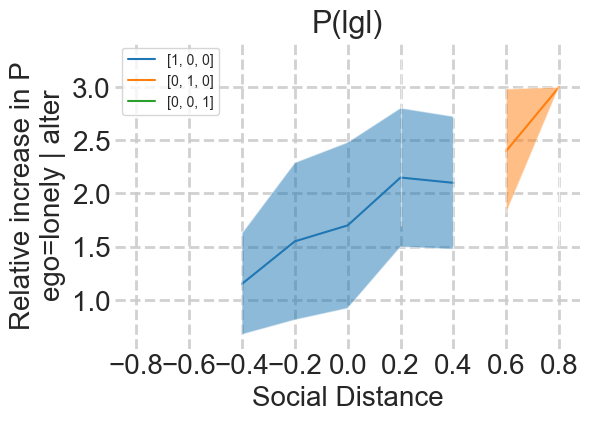

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
for row_id, point in enumerate(conf["points"][0]):
    # for column_id, point in enumerate(row):
    line_mean = []
    line_std = []
    for a in conf["a_s"]:
        model_path = f"p{'-'.join(str(np.round(p,2)) for p in point)}_b{conf['beta']}_sd{conf['sim_dur']}"
        t0_assort_dir_path = os.path.join(
            conf["base_path"], conf["tt_path"], conf_path, str(a), model_path
        )
        files = os.listdir(t0_assort_dir_path)
        p_data = []
        for file in files:
            G = nx.read_gml(os.path.join(t0_assort_dir_path, file))
            df = dos_df(dos_neighbors(G, depth=4), check_lonely(G))
            p_data.append(get_threshold_dos(df))
        line_mean.append(np.mean(p_data))
        line_std.append(np.std(p_data))
    ax.plot(conf["a_s"], line_mean, label=str(point))
    ax.fill_between(
        conf["a_s"],
        np.array(line_mean) - np.array(line_std),
        np.array(line_mean) + np.array(line_std),
        zorder=10,
        alpha=0.5,
    )
plt.legend()
# sns.barplot(x="dos", y="dos_metric",
#             data=df[df["ego_e"] == 0], errorbar=None, alpha=0.4, ax=ax)
# ax.set_ylim((-1, 1))
gf.set_frame(ax=ax)
set_labels_and_titles(
    ax=ax,
    title="P(lgl)",
    xlabel="Social Distance",
    ylabel="Relative increase in P\nego=lonely | alter",
)


# Archive

In [8]:
fig, ax = plt.subplots(len(conf["points"]), 2, figsize=(12, 6.5 * len(conf["points"])))
fig.patch.set_facecolor("white")
for ax_id, point in enumerate(conf["points"]):
    model_path = f"p{'-'.join(str(np.round(p,2)) for p in point)}_b{conf['beta']}_sd{conf['sim_dur']}"

    patches = []
    for a in conf["a_s"]:
        dyn_data_path = os.path.join(
            conf["base_path"], conf["dyn_path"], conf_path, str(a), model_path
        )
        try:
            files = os.listdir(dyn_data_path)
            data_files = {}

            for idx, file in enumerate(files):
                # Opening JSON file
                with open(os.path.join(dyn_data_path, file), "r") as f:
                    # returns JSON object as
                    # a dictionary
                    data_files[idx] = json.load(f)

            non_lonely_mean = []
            lonely_mean = []
            non_lonely_std = []
            lonely_std = []

            for df in data_files:
                non_lonely_mean.append(data_files[df]["non_lonely_mean"])
                lonely_mean.append(data_files[df]["lonely_mean"])
                non_lonely_std.append(data_files[df]["non_lonely_std"])
                lonely_std.append(data_files[df]["lonely_std"])

            # Uncomment if you want variability between files
            plot_timeseries(ax[ax_id, 0], np.array(non_lonely_mean), a)
            plot_timeseries(ax[ax_id, 0], np.array(lonely_mean), a)

            # Uncomment if you want mean variability within simulations
            # plot_timeseries(ax[ax_id, 0], np.array(non_lonely_mean), a, data_std=np.array(non_lonely_std))
            # plot_timeseries(ax[ax_id, 0], np.array(lonely_mean), a, data_std=np.array(lonely_std))

            # Right fill the data, as sim_length is variable due to window in sim
            pearsons = []
            for df in data_files:
                tdf = data_files[df]["pearsons"]
                pearsons.append(tdf + ([tdf[-1]] * (conf["sim_dur"] + 1 - len(tdf))))

            plot_timeseries(ax[ax_id, 1], np.array(pearsons), a)

            patches.append(mpatches.Patch(color=cmap(norm(a)), label=a))
        except FileNotFoundError as e:
            print(e)
        except ValueError as e:
            print(e)
        plt.legend(handles=patches)
        gf.set_frame(ax=ax[ax_id, 0])
        set_labels_and_titles(
            ax=ax[ax_id, 0],
            title="Mean energy over time",
            xlabel="Time",
            ylabel="Energy",
            tick_size=16,
            label_size=16,
            title_size=18,
        )

        gf.set_frame(ax=ax[ax_id, 1])
        set_labels_and_titles(
            ax=ax[ax_id, 1],
            title=f"Pearson dynamics point:{point}",
            xlabel="Time",
            ylabel="Pearson correlation",
            tick_size=16,
            label_size=16,
            title_size=18,
        )

plt.tight_layout()
plt.show()


array([0.20086677, 0.20173438, 0.20260402, ..., 0.50871424, 0.50871379,
       0.508713  ])

# N50 graphs

100


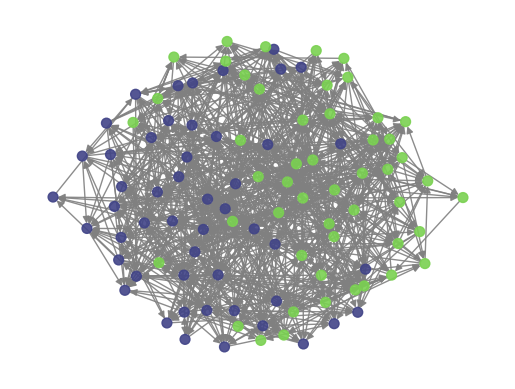

100


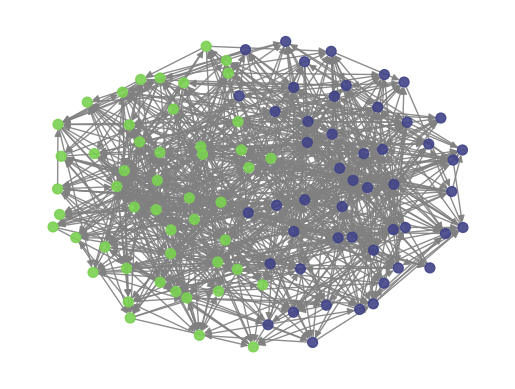

100


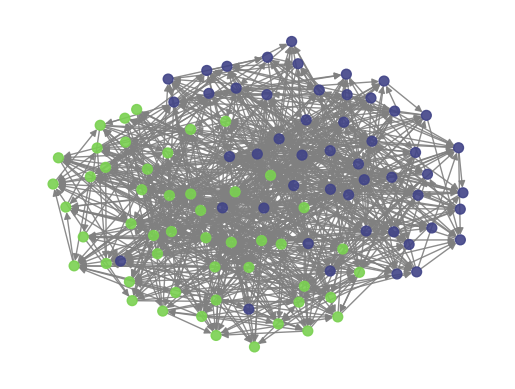

In [11]:
g_dir = os.path.join("input/t0_graphs/barabasi_albert-[0.2, 0.8]es-50n-11p", "0.4")
files = os.listdir(g_dir)

for file in files[:3]:
    G = nx.read_gml(os.path.join(g_dir, file))
    print(len(G.nodes()))
    fig, ax = plt.subplots(1,1)
    plot_grid(ax, G)
    plt.show()


In [42]:
locs

[(-14.0, 0.0),
 (-13.28029987505206, 0.02040816326530612),
 (-12.59058725531029, 0.04081632653061224),
 (-11.930862140774678, 0.061224489795918366),
 (-11.30112453144523, 0.08163265306122448),
 (-10.701374427321948, 0.1020408163265306),
 (-10.131611828404832, 0.12244897959183673),
 (-9.591836734693878, 0.14285714285714285),
 (-9.082049146189087, 0.16326530612244897),
 (-8.602249062890463, 0.18367346938775508),
 (-8.152436484798, 0.2040816326530612),
 (-7.732611411911703, 0.22448979591836732),
 (-7.342773844231571, 0.24489795918367346),
 (-6.982923781757601, 0.26530612244897955),
 (-6.653061224489797, 0.2857142857142857),
 (-6.353186172428154, 0.3061224489795918),
 (-6.083298625572678, 0.32653061224489793),
 (-5.843398583923365, 0.3469387755102041),
 (-5.633486047480217, 0.36734693877551017),
 (-5.453561016243232, 0.3877551020408163),
 (-5.303623490212411, 0.4081632653061224),
 (-5.183673469387755, 0.42857142857142855),
 (-5.093710953769262, 0.44897959183673464),
 (-5.033735943356935, 0

In [36]:
for idx, node in enumerate(sorted(G.degree, key=lambda x: x[1], reverse=True)):
    print(idx, node)

0 ('00', 37)
1 ('10', 37)
2 ('012', 34)
3 ('112', 34)
4 ('015', 28)
5 ('115', 28)
6 ('017', 27)
7 ('018', 27)
8 ('117', 27)
9 ('118', 27)
10 ('020', 26)
11 ('120', 26)
12 ('014', 25)
13 ('016', 25)
14 ('023', 25)
15 ('114', 25)
16 ('116', 25)
17 ('123', 25)
18 ('08', 24)
19 ('013', 24)
20 ('18', 24)
21 ('113', 24)
22 ('019', 23)
23 ('119', 23)
24 ('021', 22)
25 ('121', 22)
26 ('02', 21)
27 ('12', 21)
28 ('024', 20)
29 ('124', 20)
30 ('030', 19)
31 ('026', 19)
32 ('130', 19)
33 ('126', 19)
34 ('025', 18)
35 ('125', 18)
36 ('05', 17)
37 ('011', 17)
38 ('036', 17)
39 ('034', 17)
40 ('15', 17)
41 ('111', 17)
42 ('136', 17)
43 ('134', 17)
44 ('01', 16)
45 ('03', 16)
46 ('022', 16)
47 ('033', 16)
48 ('11', 16)
49 ('13', 16)
50 ('122', 16)
51 ('133', 16)
52 ('035', 15)
53 ('135', 15)
54 ('010', 14)
55 ('027', 14)
56 ('028', 14)
57 ('032', 14)
58 ('110', 14)
59 ('127', 14)
60 ('128', 14)
61 ('132', 14)
62 ('029', 13)
63 ('038', 13)
64 ('129', 13)
65 ('138', 13)
66 ('06', 12)
67 ('037', 12)
68 

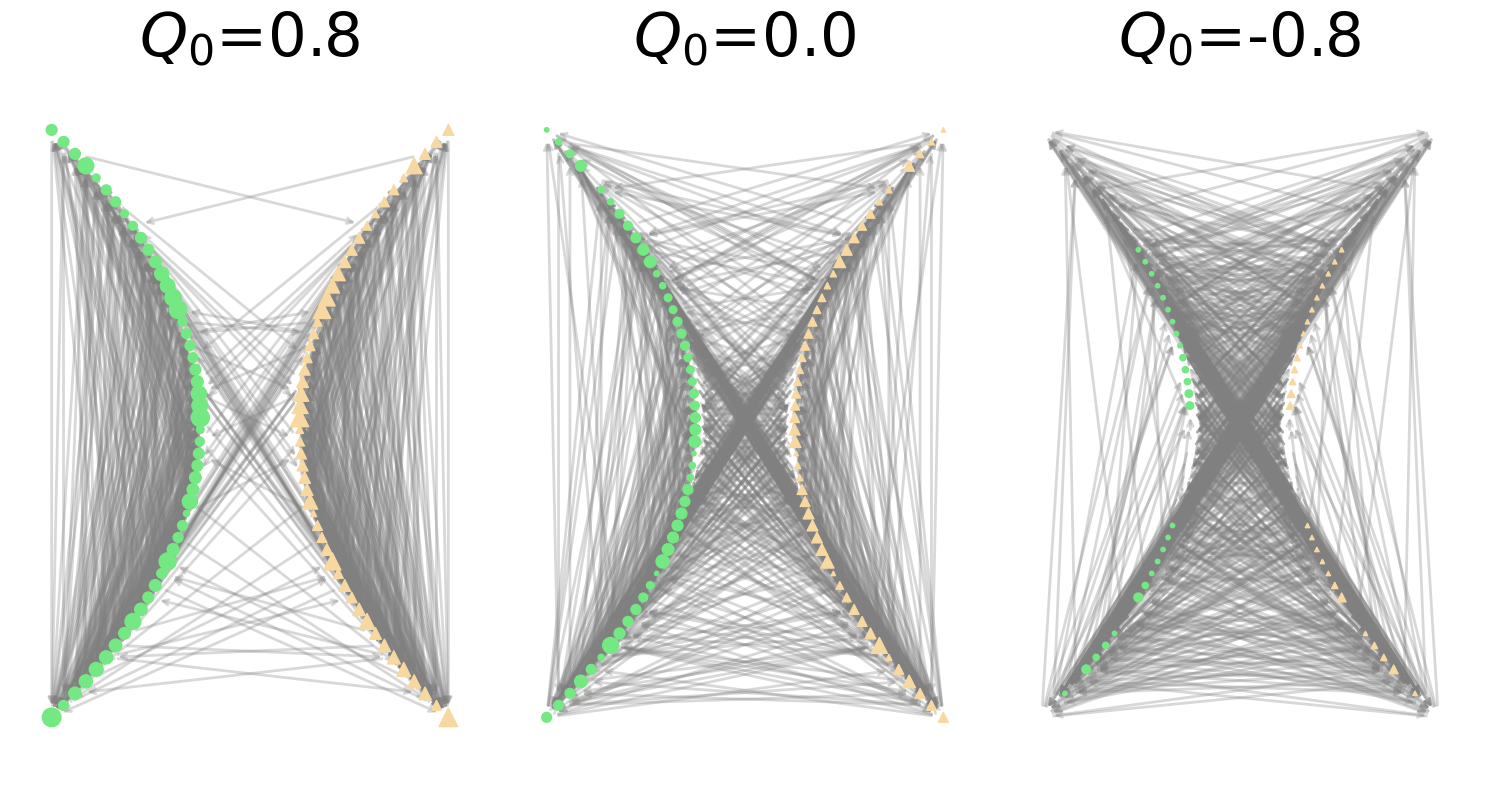

In [55]:
def plot_fig(ax, G, group_nodes, shapes, colors):
    groups = list(group_nodes.keys())
    subgraphs = {g: G.subgraph(group_nodes[g]) for g in group_nodes}
    x_loc_dict = {groups[0]:-1, groups[1]:1}
    pos = {}
    for group, sG in subgraphs.items():
        n_nodes = len(sG.nodes())
        x = [x**2 for x in np.linspace(-3, 3, n_nodes)]
        if group == groups[0]:
            locs =  [(x_loc_dict[group]-x[i]-4, y) for i, y in enumerate(np.linspace(0,1,n_nodes))]
        else:
            locs =  [(x_loc_dict[group]+x[i], y) for i, y in enumerate(np.linspace(0,1,n_nodes))]
        for idx, node in enumerate(sorted(sG.out_degree, key=lambda x: x[1], reverse=True)):
            pos[node[0]] = list(locs[idx])    
    
    sizes = [n[1]*10 for n in sorted(sG.out_degree, key=lambda x: x[1], reverse=True)]
    for sg in subgraphs:
        nx.draw_networkx_nodes(subgraphs[sg], pos=pos, node_color=colors[sg], node_shape=shapes[sg], node_size=sizes, ax=ax)
    nx.draw_networkx_edges(G, pos=pos, arrows=True, arrowstyle='->', connectionstyle="arc3,rad=0.0",
                        edge_color="gray", alpha=0.3, width=2, ax=ax)
    # Remove box around figure
    for spine in ("top", "right", "bottom", "left"):
        ax.spines[spine].set_visible(False)
        
cmap = plt.get_cmap("tab10")
fig, axs = plt.subplots(1,3, figsize=(15,8))
a_s = [0.8,0.0, -.8]
Gs = []
for a in a_s:
    g_dir = os.path.join("input/t0_graphs/barabasi_albert-[0.2, 0.8]es-50n-11p", str(a))
    files = os.listdir(g_dir)
    Gs.append(nx.read_gml(os.path.join(g_dir, files[0])))

for i, G in enumerate(Gs):
    groups = set([node[0] for node in G.nodes])    
    group_nodes = {g:[node for node in G.nodes if node[0] == g] for g in groups}

    shapes = {"0":"o", "1":"^"}
    colors = {"0":"#74E882", "1":"#F7D8A1"}

    plot_fig(axs[i], G, group_nodes, shapes, colors)
    axs[i].set_title(rf"$Q_0$={a_s[i]}", size=44)
plt.tight_layout()

In [24]:
# group_nodes["0"]
sorted(G.degree, key=lambda x: x[1], reverse=True)

[('014', 36),
 ('114', 36),
 ('013', 35),
 ('113', 35),
 ('00', 32),
 ('012', 32),
 ('10', 32),
 ('112', 32),
 ('015', 30),
 ('115', 30),
 ('019', 25),
 ('020', 25),
 ('119', 25),
 ('120', 25),
 ('016', 23),
 ('023', 23),
 ('116', 23),
 ('123', 23),
 ('021', 22),
 ('121', 22),
 ('02', 21),
 ('018', 21),
 ('025', 21),
 ('12', 21),
 ('118', 21),
 ('125', 21),
 ('017', 20),
 ('117', 20),
 ('03', 19),
 ('030', 19),
 ('13', 19),
 ('130', 19),
 ('024', 18),
 ('028', 18),
 ('032', 18),
 ('124', 18),
 ('128', 18),
 ('132', 18),
 ('01', 17),
 ('04', 17),
 ('022', 17),
 ('027', 17),
 ('026', 17),
 ('11', 17),
 ('14', 17),
 ('122', 17),
 ('127', 17),
 ('126', 17),
 ('09', 16),
 ('029', 16),
 ('033', 16),
 ('19', 16),
 ('129', 16),
 ('133', 16),
 ('010', 15),
 ('039', 15),
 ('110', 15),
 ('139', 15),
 ('06', 14),
 ('037', 14),
 ('16', 14),
 ('137', 14),
 ('011', 13),
 ('031', 13),
 ('111', 13),
 ('131', 13),
 ('08', 12),
 ('038', 12),
 ('040', 12),
 ('035', 12),
 ('041', 12),
 ('048', 12),
 ('046'